### Importing the libraries

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
pd.reset_option('all')
pd.set_option('display.max_columns',None)

### Understand the data

In [3]:
application_data = pd.read_csv('application_data.csv')

In [4]:
print(application_data.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1     

In [5]:
print(application_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


In [6]:
print(application_data.describe())

          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05  

In [7]:
previous_application = pd.read_csv('previous_application.csv')

In [8]:
print(previous_application.head())

   SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  

In [9]:
print(previous_application.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [10]:
print(previous_application.describe())

         SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03  

#### Overall data structure

### Data Cleaning and Manipulation

#### Identify Missing Values

In [11]:
missing_app = application_data.isnull().sum() / len(application_data) * 100
print(missing_app.sort_values(ascending=False).head(40)) 

COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
COMMONAREA_MEDI             69.872297
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
LIVINGAPARTMENTS_MODE       68.354953
FLOORSMIN_MODE              67.848630
FLOORSMIN_AVG               67.848630
FLOORSMIN_MEDI              67.848630
YEARS_BUILD_AVG             66.497784
YEARS_BUILD_MODE            66.497784
YEARS_BUILD_MEDI            66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_MEDI               59.376738
LANDAREA_AVG                59.376738
LANDAREA_MODE               59.376738
BASEMENTAREA_MODE           58.515956
BASEMENTAREA_MEDI           58.515956
BASEMENTAREA_AVG            58.515956
EXT_SOURCE_1                56.381073
NONLIVINGAREA_MODE          55.179164
NONLIVINGAREA_AVG           55.179164
NONLIVINGARE

In [12]:
missing_prev = previous_application.isnull().sum() / len(previous_application) * 100
print(missing_prev.sort_values(ascending=False).head(10))

RATE_INTEREST_PRIVILEGED     99.643698
RATE_INTEREST_PRIMARY        99.643698
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
DAYS_TERMINATION             40.298129
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
dtype: float64


In [13]:
#Identify Missing Values which are more than 50%. The 50% threshold is a practical rule of thumb, not a universally validated standard.
missing_percentage_app = application_data.isnull().mean() * 100
cols_missing_more_than_30_app = missing_percentage_app[missing_percentage_app > 30].index.tolist()
print(cols_missing_more_than_30_app)

['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', '

In [14]:
missing_percentage_prev = previous_application.isnull().mean() * 100
cols_missing_more_than_30_prev = missing_percentage_prev[missing_percentage_prev > 30].index.tolist()
cols_missing_more_than_30_prev

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

#### Remove unnecessary columns

In [15]:
with pd.option_context('display.max_columns', None):
    display(application_data)
    print(application_data.columns)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


##### Building Attributes are information about the client’s living environment. These variables will help in market segmentation, and not relevant to individual’s credit risk. Document verification flags are useful for understanding the completeness of the application, not relevant for credit scoring. Hence dropping these variables.

In [16]:
unnecessary_columns_app = [
    'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
    'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
    'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
    'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
    'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
    'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE',
    'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
    'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
    'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
    'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI',
    'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
    'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
    'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 
    'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
    'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
    'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'
]

application_data.drop(columns=unnecessary_columns_app, inplace=True)
application_data.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_

##### RATE_INTEREST_PRIMARY and RATE_INTEREST_PRIVILEGED columns have a very high percentage of missing values. SELLERPLACE_AREA and NAME_SELLER_INDUSTRY includes details about the seller so less probably linked to the applicant’s financial risk. So removing it.

In [17]:
unnecessary_columns_prev = [
    'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 
    'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY'
]
previous_application.drop(columns=unnecessary_columns_prev, inplace=True)
print(previous_application.columns.tolist())

['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [18]:
application_data.shape

(307511, 55)

In [19]:
previous_application.shape

(1670214, 33)

##### Columns with more 30% missing values

In [20]:
(round(100*(application_data.isnull().sum()/len(application_data.index)),2))

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OWN_CAR_AGE                    65.99
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
F

In [21]:
(round(100*(previous_application.isnull().sum()/len(previous_application.index)),2))

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
D

**For Application data, critical columns that have missing values:**

- OWN_CAR_AGE - 65.99% missing, this variable helps to understand client's lifestyle
- OCCUPATION_TYPE - 31.35% missing, this variable helps to understand client's employment sector
- EXT_SOURCE_1 - 56.38% missing, this variable helps to understand normalized score from an external data source

In [22]:
# For OWN_CAR_AGE missing values could be because the client does not own a car. So, creating missing indicator and marking missing values as -1 to specify no car.
application_data['HAS_CAR'] = application_data['OWN_CAR_AGE'].notnull().astype(int)
application_data['OWN_CAR_AGE'] = application_data['OWN_CAR_AGE'].fillna(-1)

In [23]:
# For OCCUPATION_TYPE is a categorical column so we can impute the missing values as 'Unknown'
application_data['OCCUPATION_TYPE'] = application_data['OCCUPATION_TYPE'].fillna('Unknown')

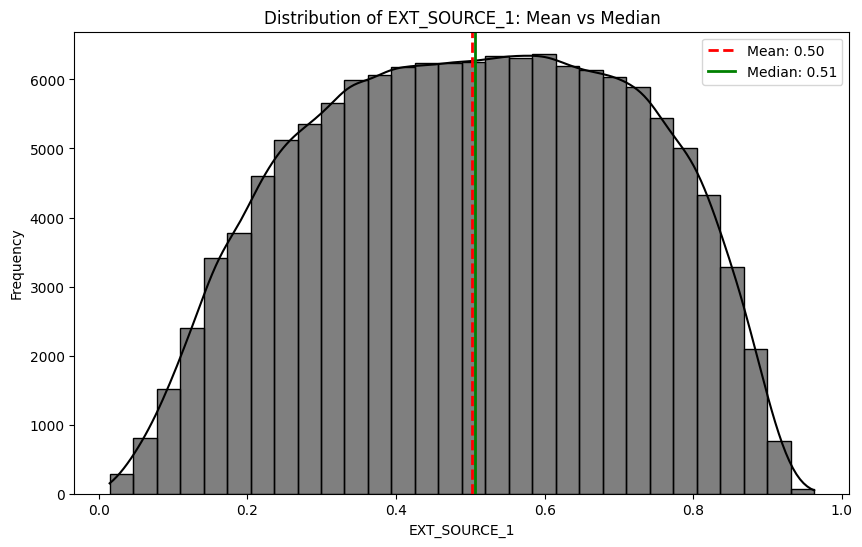

In [24]:
# To understand the EXT_SOURCE_1 data:
ext_source_1 = application_data['EXT_SOURCE_1'].dropna()
mean_val = ext_source_1.mean()
median_val = ext_source_1.median()
plt.figure(figsize=(10, 6))
sns.histplot(ext_source_1, kde=True, color='black', bins=30)
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
plt.title('Distribution of EXT_SOURCE_1: Mean vs Median')
plt.xlabel('EXT_SOURCE_1')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [25]:
# For EXT_SOURCE_1, missing value could be due to system error during the sync. So, creating missing indicator and imputing it with median. Mean and Median are almost the same. Using median instead of mean because of its way in handling outliers.
application_data['EXT_SOURCE_1_missing'] = application_data['EXT_SOURCE_1'].isnull().astype(int)
median_ext1 = application_data['EXT_SOURCE_1'].median() 
application_data['EXT_SOURCE_1'] = application_data['EXT_SOURCE_1'].fillna(median_ext1)

In [26]:
print(application_data[['OWN_CAR_AGE', 'HAS_CAR', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_1_missing']].isnull().sum())

OWN_CAR_AGE             0
HAS_CAR                 0
OCCUPATION_TYPE         0
EXT_SOURCE_1            0
EXT_SOURCE_1_missing    0
dtype: int64


**For Previous Application data, critical columns that have missing values:**

##### Important for understanding the applicant’s commitment.
- AMT_DOWN_PAYMENT - 53.64% missing
- RATE_DOWN_PAYMENT - 53.64% missing

##### Previously accompanied person, important as it captures social or behavioural cues.
- NAME_TYPE_SUITE - 49.12% missing

##### These are the timing details related to the previous credit’s disbursement and repayment schedule. 
- DAYS_FIRST_DRAWING - 40.30% missing
- DAYS_FIRST_DUE - 40.30% missing
- DAYS_LAST_DUE_1ST_VERSION - 40.30% missing
- DAYS_LAST_DUE - 40.30% missing
- DAYS_TERMINATION - 40.30% missing

##### Indicates client's insurance during the previous application.
- NFLAG_INSURED_ON_APPROVAL - 40.30% missing

In [27]:
previous_application.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_DOWN_PAYMENT               895844
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
RATE_DOWN_PAYMENT              895844
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                820405
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMB

In [28]:
# To capture whether a value was originally provided
previous_application['HAS_DOWN_PAYMENT'] = previous_application['AMT_DOWN_PAYMENT'].notnull().astype(int)
previous_application['HAS_RATE_DOWN_PAYMENT'] = previous_application['RATE_DOWN_PAYMENT'].notnull().astype(int)

# Impute missing down payment values with 0, assuming that missing implies no down payment was made.
previous_application['AMT_DOWN_PAYMENT'] = previous_application['AMT_DOWN_PAYMENT'].fillna(0)
previous_application['RATE_DOWN_PAYMENT'] = previous_application['RATE_DOWN_PAYMENT'].fillna(0)

In [29]:
# Impute missing values with the label "Unknown" 
previous_application['NAME_TYPE_SUITE'] = previous_application['NAME_TYPE_SUITE'].fillna('Unknown')

In [30]:
time_cols = ['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 
             'DAYS_LAST_DUE', 'DAYS_TERMINATION']
for col in time_cols:
    # To capture whether a value was originally provided
    indicator_col = col + '_missing'
    previous_application[indicator_col] = previous_application[col].isnull().astype(int)
    
    # Impute missing values with the median of that column, this is to preserve the central tendency
    median_val = previous_application[col].median()
    previous_application[col] = previous_application[col].fillna(median_val)

In [31]:
# Assuming that a missing flag means the applicant did not request insurance.
previous_application['NFLAG_INSURED_ON_APPROVAL'] = previous_application['NFLAG_INSURED_ON_APPROVAL'].fillna(0)

In [32]:
cols_to_check = (['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'NAME_TYPE_SUITE', 'NFLAG_INSURED_ON_APPROVAL'] + time_cols)
print(previous_application[cols_to_check].isnull().sum())

AMT_DOWN_PAYMENT             0
RATE_DOWN_PAYMENT            0
NAME_TYPE_SUITE              0
NFLAG_INSURED_ON_APPROVAL    0
DAYS_FIRST_DRAWING           0
DAYS_FIRST_DUE               0
DAYS_LAST_DUE_1ST_VERSION    0
DAYS_LAST_DUE                0
DAYS_TERMINATION             0
dtype: int64


##### Columns with less than 30%

In [33]:
print(application_data.isnull().sum())

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                        0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

**Even if the missing value is in small percentage, I wish to impute instead of dropping the rows**

In [34]:
application_data['AMT_ANNUITY'].skew()

np.float64(1.5797773638612507)

In [35]:
# skewness more than 1 so using median to impute
median_amt_annuity = application_data['AMT_ANNUITY'].median()
application_data['AMT_ANNUITY'].fillna(median_amt_annuity, inplace=True)

In [36]:
application_data['AMT_GOODS_PRICE'].skew()

np.float64(1.3490003414747445)

In [37]:
median_amt_goods_price = application_data['AMT_GOODS_PRICE'].median()
application_data['AMT_GOODS_PRICE'].fillna(median_amt_goods_price, inplace=True)

In [38]:
# using mode as it is discrete numerical variable
mode_cnt_fam_members = application_data['CNT_FAM_MEMBERS'].mode()[0]
application_data['CNT_FAM_MEMBERS'].fillna(mode_cnt_fam_members, inplace=True)

In [39]:
application_data['EXT_SOURCE_2'].skew()

np.float64(-0.7935760449636996)

In [40]:
# skewness less than 1, so using mean
mean_ext_source_2 = application_data['EXT_SOURCE_2'].mean()
application_data['EXT_SOURCE_2'].fillna(mean_ext_source_2, inplace=True)

In [41]:
# Creating a missing indicator for EXT_SOURCE_3
application_data['EXT_SOURCE_3_missing'] = application_data['EXT_SOURCE_3'].isnull().astype(int)
# Imputing with the median to preserve central tendency
median_ext_source_3 = application_data['EXT_SOURCE_3'].median()
application_data['EXT_SOURCE_3'].fillna(median_ext_source_3, inplace=True)

In [42]:
bureau_cols = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 
               'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 
               'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

for col in bureau_cols:
    median_val = application_data[col].median()
    application_data[col].fillna(median_val, inplace=True)

In [43]:
social_cols = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
               'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']
for col in social_cols:
    median_val = application_data[col].median()
    application_data[col].fillna(median_val, inplace=True)

In [44]:
application_data['DAYS_LAST_PHONE_CHANGE'].skew()

np.float64(-0.7136056678591622)

In [45]:
mean_days_last_phone_change = application_data['DAYS_LAST_PHONE_CHANGE'].mean()
application_data['DAYS_LAST_PHONE_CHANGE'].fillna(mean_days_last_phone_change, inplace=True)

In [46]:
application_data['NAME_TYPE_SUITE'].fillna('Unknown', inplace=True)

In [47]:
print(application_data.isnull().sum())

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OWN_CAR_AGE                    0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RAT

In [48]:
print(previous_application.isnull().sum())

SK_ID_PREV                                0
SK_ID_CURR                                0
NAME_CONTRACT_TYPE                        0
AMT_ANNUITY                          372235
AMT_APPLICATION                           0
AMT_CREDIT                                1
AMT_DOWN_PAYMENT                          0
AMT_GOODS_PRICE                      385515
WEEKDAY_APPR_PROCESS_START                0
HOUR_APPR_PROCESS_START                   0
FLAG_LAST_APPL_PER_CONTRACT               0
NFLAG_LAST_APPL_IN_DAY                    0
RATE_DOWN_PAYMENT                         0
NAME_CASH_LOAN_PURPOSE                    0
NAME_CONTRACT_STATUS                      0
DAYS_DECISION                             0
NAME_PAYMENT_TYPE                         0
CODE_REJECT_REASON                        0
NAME_TYPE_SUITE                           0
NAME_CLIENT_TYPE                          0
NAME_GOODS_CATEGORY                       0
NAME_PORTFOLIO                            0
NAME_PRODUCT_TYPE               

In [49]:
previous_application['AMT_ANNUITY'].skew()

np.float64(2.6925715126729455)

In [50]:
previous_application['AMT_CREDIT'].skew()

np.float64(3.2458146495467357)

In [51]:
previous_application['AMT_GOODS_PRICE'].skew()

np.float64(3.0736896781923937)

In [52]:
previous_application['CNT_PAYMENT'].skew()

np.float64(1.5314029823509057)

In [53]:
# Imputing with Median as skewness is more than 1
numeric_cols_to_impute = ['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']

for col in numeric_cols_to_impute:
    median_val = previous_application[col].median()
    previous_application[col].fillna(median_val, inplace=True)

In [54]:
previous_application['PRODUCT_COMBINATION'].fillna("Unknown", inplace=True)

In [55]:
print(previous_application.isnull().sum())

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                          0
AMT_APPLICATION                      0
AMT_CREDIT                           0
AMT_DOWN_PAYMENT                     0
AMT_GOODS_PRICE                      0
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT                    0
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                      0
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE                         0
CNT_PAYMENT                          0
NAME_YIELD_GROUP         

In [56]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

#### Fixing readability

In [57]:
application_data['AGE'] = abs(application_data['DAYS_BIRTH']//365)
application_data = application_data.drop(['DAYS_BIRTH'],axis=1)

In [58]:
application_data['YEARS_EMPLOYED'] = abs(application_data['DAYS_EMPLOYED']//365)
application_data = application_data.drop(['DAYS_EMPLOYED'],axis=1)

In [59]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,HAS_CAR,EXT_SOURCE_1_missing,EXT_SOURCE_3_missing,AGE,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-3648.0,-2120,-1.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,26,2
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,-1.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,46,4
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.505998,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,53,1
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-9833.0,-2437,-1.0,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.505998,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1,53,9
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-4311.0,-3458,-1.0,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.505998,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,55,9


#### Finding outliers

In [60]:
# Function to calculate IQR, return lower bound, upper bound and the outlier rows

def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return lower_bound, upper_bound, outliers

In [61]:
# Get the list of required numeric columns
numeric_cols_app = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE']

In [62]:
for col in numeric_cols_app:
    lb, ub, outliers = detect_outliers_iqr(application_data, col)
    if len(outliers) > 0:
        print(f"{col}:")
        print(f"  Lower Bound: {lb:.2f}, Upper Bound: {ub:.2f}")
        print(f"  Count of outliers: {len(outliers)}")
        print(f"  Sample outlier values:\n{outliers[col].head()}\n")

AMT_INCOME_TOTAL:
  Lower Bound: -22500.00, Upper Bound: 337500.00
  Count of outliers: 14035
  Sample outlier values:
7     360000.0
22    450000.0
33    360000.0
49    360000.0
51    540000.0
Name: AMT_INCOME_TOTAL, dtype: float64

AMT_CREDIT:
  Lower Bound: -537975.00, Upper Bound: 1616625.00
  Count of outliers: 6562
  Sample outlier values:
60     1663987.5
135    1755000.0
189    2250000.0
235    1710000.0
314    1800000.0
Name: AMT_CREDIT, dtype: float64

AMT_ANNUITY:
  Lower Bound: -10584.00, Upper Bound: 61704.00
  Count of outliers: 7504
  Sample outlier values:
60     86989.5
94     64107.0
112    73611.0
189    83515.5
191    77494.5
Name: AMT_ANNUITY, dtype: float64

AMT_GOODS_PRICE:
  Lower Bound: -423000.00, Upper Bound: 1341000.00
  Count of outliers: 14728
  Sample outlier values:
6     1395000.0
7     1530000.0
48    1350000.0
49    1350000.0
60    1588500.0
Name: AMT_GOODS_PRICE, dtype: float64



In [63]:
numeric_cols_prev = previous_application.select_dtypes(include=[np.number]).columns

In [64]:
numeric_cols_prev

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'DAYS_DECISION', 'CNT_PAYMENT',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL',
       'HAS_DOWN_PAYMENT', 'HAS_RATE_DOWN_PAYMENT',
       'DAYS_FIRST_DRAWING_missing', 'DAYS_FIRST_DUE_missing',
       'DAYS_LAST_DUE_1ST_VERSION_missing', 'DAYS_LAST_DUE_missing',
       'DAYS_TERMINATION_missing'],
      dtype='object')

In [65]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,HAS_DOWN_PAYMENT,HAS_RATE_DOWN_PAYMENT,DAYS_FIRST_DRAWING_missing,DAYS_FIRST_DUE_missing,DAYS_LAST_DUE_1ST_VERSION_missing,DAYS_LAST_DUE_missing,DAYS_TERMINATION_missing
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,XAP,Approved,-73,Cash through the bank,XAP,Unknown,Repeater,Mobile,POS,XNA,Country-wide,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,1,1,0,0,0,0,0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,0.0,607500.0,THURSDAY,11,Y,1,0.0,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,0,0,0,0,0,0,0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,0.0,112500.0,TUESDAY,11,Y,1,0.0,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0,0,0,0,0,0,0,0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,0.0,450000.0,MONDAY,7,Y,1,0.0,XNA,Approved,-512,Cash through the bank,XAP,Unknown,Repeater,XNA,Cash,x-sell,Credit and cash offices,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0,0,0,0,0,0,0,0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,0.0,337500.0,THURSDAY,9,Y,1,0.0,Repairs,Refused,-781,Cash through the bank,HC,Unknown,Repeater,XNA,Cash,walk-in,Credit and cash offices,24.0,high,Cash Street: high,365243.0,-831.0,-361.0,-537.0,-499.0,0.0,0,0,1,1,1,1,1


In [66]:
# Get the list of required numeric columns
numeric_cols_app = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_DOWN_PAYMENT','AMT_GOODS_PRICE','HOUR_APPR_PROCESS_START','DAYS_DECISION','CNT_PAYMENT',
                    'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']

In [67]:
for col in numeric_cols_app:
    lb, ub, outliers = detect_outliers_iqr(previous_application, col)
    if len(outliers) > 0:
        print(f"{col}:")
        print(f"  Lower Bound: {lb:.2f}, Upper Bound: {ub:.2f}")
        print(f"  Count of outliers: {len(outliers)}")
        print(f"  Sample outlier values:\n{outliers[col].head()}\n")

AMT_ANNUITY:
  Lower Bound: -6368.30, Upper Bound: 30739.42
  Count of outliers: 162620
  Sample outlier values:
3     47041.335
4     31924.395
23    39475.305
37    39111.075
47    75897.630
Name: AMT_ANNUITY, dtype: float64

AMT_APPLICATION:
  Lower Bound: -223740.00, Upper Bound: 422820.00
  Count of outliers: 208019
  Sample outlier values:
1      607500.0
3      450000.0
20     450000.0
23    1129500.0
47    2025000.0
Name: AMT_APPLICATION, dtype: float64

AMT_CREDIT:
  Lower Bound: -264226.50, Upper Bound: 504805.50
  Count of outliers: 179989
  Sample outlier values:
1      679671.0
23    1277104.5
47    2241513.0
79    1031193.0
80     675000.0
Name: AMT_CREDIT, dtype: float64

AMT_DOWN_PAYMENT:
  Lower Bound: 0.00, Upper Bound: 0.00
  Count of outliers: 404516
  Sample outlier values:
15    12649.5
16     1350.0
28     9000.0
37    13500.0
39     4500.0
Name: AMT_DOWN_PAYMENT, dtype: float64

AMT_GOODS_PRICE:
  Lower Bound: -101857.50, Upper Bound: 349762.50
  Count of outlie

##### Explanation for Outliers:

##### For Application Data:
- AMT_INCOME_TOTAL: May represent a small group of very high-income clients
- AMT_CREDIT: The amount could be high based on other factors (such as collateral) while sanctioning the loan
- AMT_ANNUITY: The amount could be high based on other factors (such as collateral) while sanctioning the loan
- AMT_GOODS_PRICE: The amount could be high based on other factors (such as collateral) while sanctioning the loan

##### For Previous Application:
- AMT_ANNUITY: The amount could be high based on other factors (such as collateral) while sanctioning the loan
- AMT_APPLICATION: Client can quote any amount for loan based on their requirement
- AMT_CREDIT: The amount could be high based on other factors (such as collateral) while sanctioning the loan
- AMT_DOWN_PAYMENT: Not many people paid down payment for the loan
- AMT_GOODS_PRICE: The amount could be high based on other factors (such as collateral) while sanctioning the loan
- Other variables (time variables, HOUR_APPR_PROCESS_START, CNT_PAYMENT, etc.) : Could be due to processing time which involves manual work

#### Data Imbalance Check
To determine imbalanced data, we need to check the distribution of the target variable.
In the EDA Credit dataset, the target variable is named as TARGET - 1 indicates that the client had payment difficulties and 0 indicates no difficulties.

In [68]:
# Calculate frequency counts for the target variable
target_counts = application_data['TARGET'].value_counts()
print("Frequency Distribution of TARGET:")
print(target_counts)

Frequency Distribution of TARGET:
TARGET
0    282686
1     24825
Name: count, dtype: int64


In [69]:
# Extract counts for each class
count_majority = target_counts[0]
count_minority = target_counts[1]

# Calculate ratio: majority / minority
imbalance_ratio = count_majority / count_minority
print(f"Imbalance Ratio (majority:minority): {imbalance_ratio:.2f}:1")

# Calculate percentage of minority class
minority_percentage = (count_minority / application_data.shape[0]) * 100
print(f"Minority Class Percentage: {minority_percentage:.2f}%")

Imbalance Ratio (majority:minority): 11.39:1
Minority Class Percentage: 8.07%


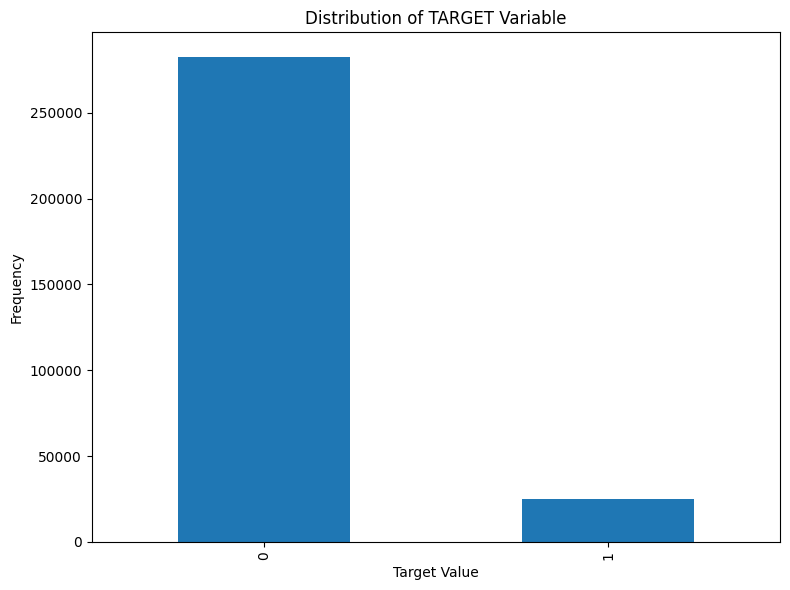

In [70]:
plt.figure(figsize=(8, 6))
application_data['TARGET'].value_counts().plot(kind='bar')
plt.title('Distribution of TARGET Variable')
plt.xlabel('Target Value')  
plt.ylabel('Frequency')     
plt.tight_layout()
plt.show()

- Every 1 default case, there are 11.39 non-default cases
- Minority Class Percentage: 8.07%, so it is a classic imbalanced scenario
- In modeling, this imbalance might lead to a bias toward predicting the majority class so we need to mitigate that

### Data Analysis

Now let's merge Application Data with Previous Application with left join manner, so that the information of Application Data should remain intact.

In [71]:
merged_data = pd.merge(left=application_data,right=previous_application, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,HAS_CAR,EXT_SOURCE_1_missing,EXT_SOURCE_3_missing,AGE,YEARS_EMPLOYED,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,HAS_DOWN_PAYMENT,HAS_RATE_DOWN_PAYMENT,DAYS_FIRST_DRAWING_missing,DAYS_FIRST_DUE_missing,DAYS_LAST_DUE_1ST_VERSION_missing,DAYS_LAST_DUE_missing,DAYS_TERMINATION_missing
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-3648.0,-2120,-1.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,26,2,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,XAP,Approved,-606.0,XNA,XAP,Unknown,New,Vehicles,POS,XNA,Stone,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,-1.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,46,4,1810518.0,Cash loans,98356.995,900000.0,1035882.0,0.0,900000.0,FRIDAY,12.0,Y,1.0,0.000000,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,-1.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,46,4,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.000000,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,-1.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,46,4,2396755.0,Consumer loans,6737.310,68809.5,68053.

#### Univariate Analysis

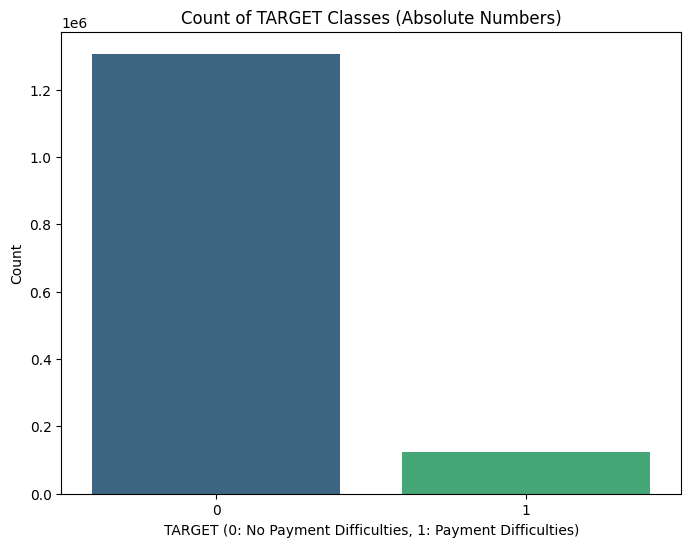

In [72]:
plt.figure(figsize=(8, 6))
sns.countplot(x='TARGET', data=merged_data, palette='viridis')
plt.title('Count of TARGET Classes (Absolute Numbers)')
plt.xlabel('TARGET (0: No Payment Difficulties, 1: Payment Difficulties)')
plt.ylabel('Count')
plt.show()

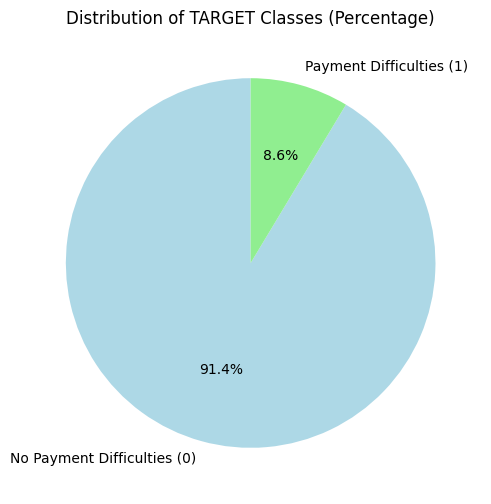

In [73]:
target_counts = merged_data['TARGET'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(target_counts, 
        labels=['No Payment Difficulties (0)', 'Payment Difficulties (1)'], 
        autopct='%1.1f%%', 
        colors=['lightblue', 'lightgreen'], 
        startangle=90)
plt.title('Distribution of TARGET Classes (Percentage)')
plt.show()

These plots reveal that only about 8.07% of the applicants are in the minority class who have payment difficulties. So special techniques should be applied.

**Lets group some data to gain better insights**

In [74]:
def age_group(x):
    if (x <= 30):
        return 'Young'
    elif (x > 30 and x <= 60):
        return 'Middle Aged'
    else:
        return 'Senior Citizen'

In [75]:
merged_data['AGE_GROUP'] = merged_data['AGE'].apply(age_group)
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,HAS_CAR,EXT_SOURCE_1_missing,EXT_SOURCE_3_missing,AGE,YEARS_EMPLOYED,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,HAS_DOWN_PAYMENT,HAS_RATE_DOWN_PAYMENT,DAYS_FIRST_DRAWING_missing,DAYS_FIRST_DUE_missing,DAYS_LAST_DUE_1ST_VERSION_missing,DAYS_LAST_DUE_missing,DAYS_TERMINATION_missing,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-3648.0,-2120,-1.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,26,2,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,XAP,Approved,-606.0,XNA,XAP,Unknown,New,Vehicles,POS,XNA,Stone,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Young
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,-1.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,46,4,1810518.0,Cash loans,98356.995,900000.0,1035882.0,0.0,900000.0,FRIDAY,12.0,Y,1.0,0.000000,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Middle Aged
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,-1.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,46,4,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.000000,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Middle Aged
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,-1.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,46,4,2396755.

In [76]:
def credit_group(x):
    if (x < 500000):
        return 'Low'
    elif (x >= 500000 and x < 750000):
        return 'Medium'
    else:
        return 'High'

In [77]:
merged_data['CREDIT_GROUP_x'] = merged_data['AMT_CREDIT_x'].apply(credit_group)
merged_data['CREDIT_GROUP_y'] = merged_data['AMT_CREDIT_y'].apply(credit_group)
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,HAS_CAR,EXT_SOURCE_1_missing,EXT_SOURCE_3_missing,AGE,YEARS_EMPLOYED,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,HAS_DOWN_PAYMENT,HAS_RATE_DOWN_PAYMENT,DAYS_FIRST_DRAWING_missing,DAYS_FIRST_DUE_missing,DAYS_LAST_DUE_1ST_VERSION_missing,DAYS_LAST_DUE_missing,DAYS_TERMINATION_missing,AGE_GROUP,CREDIT_GROUP_x,CREDIT_GROUP_y
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-3648.0,-2120,-1.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,26,2,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,XAP,Approved,-606.0,XNA,XAP,Unknown,New,Vehicles,POS,XNA,Stone,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Young,Low,Low
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,-1.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,46,4,1810518.0,Cash loans,98356.995,900000.0,1035882.0,0.0,900000.0,FRIDAY,12.0,Y,1.0,0.000000,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Middle Aged,High,High
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,-1.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,46,4,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.000000,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Middle Aged,High,Low
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,-1.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,0.535276,1.0,0.0,1

In [78]:
def income_group(x):
    if (x < 100000):
        return 'Low'
    elif(x >= 100000 and x < 150000):
        return 'Medium'
    else:
        return 'High'

In [79]:
merged_data['INCOME_GROUP'] = merged_data['AMT_INCOME_TOTAL'].apply(income_group)
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,HAS_CAR,EXT_SOURCE_1_missing,EXT_SOURCE_3_missing,AGE,YEARS_EMPLOYED,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,HAS_DOWN_PAYMENT,HAS_RATE_DOWN_PAYMENT,DAYS_FIRST_DRAWING_missing,DAYS_FIRST_DUE_missing,DAYS_LAST_DUE_1ST_VERSION_missing,DAYS_LAST_DUE_missing,DAYS_TERMINATION_missing,AGE_GROUP,CREDIT_GROUP_x,CREDIT_GROUP_y,INCOME_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-3648.0,-2120,-1.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,26,2,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,XAP,Approved,-606.0,XNA,XAP,Unknown,New,Vehicles,POS,XNA,Stone,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Young,Low,Low,High
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,-1.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,46,4,1810518.0,Cash loans,98356.995,900000.0,1035882.0,0.0,900000.0,FRIDAY,12.0,Y,1.0,0.000000,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Middle Aged,High,High,High
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,-1.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,46,4,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.000000,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Middle Aged,High,Low,High
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,-1.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267

In [80]:
merged_data['EXT_SOURCE_SCORE'] = round(((merged_data['EXT_SOURCE_1'] + merged_data['EXT_SOURCE_2'] + merged_data['EXT_SOURCE_3'])/3),2)
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,HAS_CAR,EXT_SOURCE_1_missing,EXT_SOURCE_3_missing,AGE,YEARS_EMPLOYED,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,HAS_DOWN_PAYMENT,HAS_RATE_DOWN_PAYMENT,DAYS_FIRST_DRAWING_missing,DAYS_FIRST_DUE_missing,DAYS_LAST_DUE_1ST_VERSION_missing,DAYS_LAST_DUE_missing,DAYS_TERMINATION_missing,AGE_GROUP,CREDIT_GROUP_x,CREDIT_GROUP_y,INCOME_GROUP,EXT_SOURCE_SCORE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-3648.0,-2120,-1.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,26,2,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,XAP,Approved,-606.0,XNA,XAP,Unknown,New,Vehicles,POS,XNA,Stone,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Young,Low,Low,High,0.16
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,-1.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,46,4,1810518.0,Cash loans,98356.995,900000.0,1035882.0,0.0,900000.0,FRIDAY,12.0,Y,1.0,0.000000,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Middle Aged,High,High,High,0.49
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,-1.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,46,4,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.000000,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Middle Aged,High,Low,High,0.49
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,-1.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDA

In [81]:
def ext_source_group(x):
    if (x < 0.4):
        return 'Low'
    elif (x >= 0.4 and x < 0.6):
        return 'Medium'
    else:
        return 'High'

In [82]:
merged_data['EXT_SCORE_CATEGORY'] = merged_data['EXT_SOURCE_SCORE'].apply(ext_source_group)
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,HAS_CAR,EXT_SOURCE_1_missing,EXT_SOURCE_3_missing,AGE,YEARS_EMPLOYED,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,HAS_DOWN_PAYMENT,HAS_RATE_DOWN_PAYMENT,DAYS_FIRST_DRAWING_missing,DAYS_FIRST_DUE_missing,DAYS_LAST_DUE_1ST_VERSION_missing,DAYS_LAST_DUE_missing,DAYS_TERMINATION_missing,AGE_GROUP,CREDIT_GROUP_x,CREDIT_GROUP_y,INCOME_GROUP,EXT_SOURCE_SCORE,EXT_SCORE_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-3648.0,-2120,-1.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,26,2,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,XAP,Approved,-606.0,XNA,XAP,Unknown,New,Vehicles,POS,XNA,Stone,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Young,Low,Low,High,0.16,Low
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,-1.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,46,4,1810518.0,Cash loans,98356.995,900000.0,1035882.0,0.0,900000.0,FRIDAY,12.0,Y,1.0,0.000000,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Middle Aged,High,High,High,0.49,Medium
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,-1.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,46,4,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.000000,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Middle Aged,High,Low,High,0.49,Medium
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,-1.0

##### Categorical Univariate Analysis

In [83]:
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,HAS_CAR,EXT_SOURCE_1_missing,EXT_SOURCE_3_missing,AGE,YEARS_EMPLOYED,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,HAS_DOWN_PAYMENT,HAS_RATE_DOWN_PAYMENT,DAYS_FIRST_DRAWING_missing,DAYS_FIRST_DUE_missing,DAYS_LAST_DUE_1ST_VERSION_missing,DAYS_LAST_DUE_missing,DAYS_TERMINATION_missing,AGE_GROUP,CREDIT_GROUP_x,CREDIT_GROUP_y,INCOME_GROUP,EXT_SOURCE_SCORE,EXT_SCORE_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-3648.0,-2120,-1.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,26,2,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,XAP,Approved,-606.0,XNA,XAP,Unknown,New,Vehicles,POS,XNA,Stone,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Young,Low,Low,High,0.16,Low
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,-1.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,46,4,1810518.0,Cash loans,98356.995,900000.0,1035882.0,0.0,900000.0,FRIDAY,12.0,Y,1.0,0.000000,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Middle Aged,High,High,High,0.49,Medium
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,-1.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,46,4,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.000000,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Middle Aged,High,Low,High,0.49,Medium
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,-1.0

In [84]:
merged_data_target_0 = merged_data[merged_data['TARGET'] == 0]
merged_data_target_1 = merged_data[merged_data['TARGET'] == 1]

In [85]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(merged_data.dtypes)

SK_ID_CURR                             int64
TARGET                                 int64
NAME_CONTRACT_TYPE_x                  object
CODE_GENDER                           object
FLAG_OWN_CAR                          object
FLAG_OWN_REALTY                       object
CNT_CHILDREN                           int64
AMT_INCOME_TOTAL                     float64
AMT_CREDIT_x                         float64
AMT_ANNUITY_x                        float64
AMT_GOODS_PRICE_x                    float64
NAME_TYPE_SUITE_x                     object
NAME_INCOME_TYPE                      object
NAME_EDUCATION_TYPE                   object
NAME_FAMILY_STATUS                    object
NAME_HOUSING_TYPE                     object
REGION_POPULATION_RELATIVE           float64
DAYS_REGISTRATION                    float64
DAYS_ID_PUBLISH                        int64
OWN_CAR_AGE                          float64
FLAG_MOBIL                             int64
FLAG_EMP_PHONE                         int64
FLAG_WORK_

In [86]:
categorical_cols = [col for col in merged_data.columns if merged_data[col].dtype == 'object' and col != 'TARGET' and col != 'SK_ID_CURR' and col != 'SK_ID_PREV']
numerical_cols = [col for col in merged_data.columns if merged_data[col].dtype != 'object' and col != 'TARGET' and col != 'SK_ID_CURR' and col != 'SK_ID_PREV']

In [87]:
for column in categorical_cols:
    print("Non-Defaulters")
    print(merged_data_target_0[column].value_counts(normalize=True))
    print("Defaulters")
    print(merged_data_target_1[column].value_counts(normalize=True))
    print("\n")

Non-Defaulters
NAME_CONTRACT_TYPE_x
Cash loans         0.920785
Revolving loans    0.079215
Name: proportion, dtype: float64
Defaulters
NAME_CONTRACT_TYPE_x
Cash loans         0.951711
Revolving loans    0.048289
Name: proportion, dtype: float64


Non-Defaulters
CODE_GENDER
F      0.682162
M      0.317796
XNA    0.000042
Name: proportion, dtype: float64
Defaulters
CODE_GENDER
F    0.594795
M    0.405205
Name: proportion, dtype: float64


Non-Defaulters
FLAG_OWN_CAR
N    0.660377
Y    0.339623
Name: proportion, dtype: float64
Defaulters
FLAG_OWN_CAR
N    0.685528
Y    0.314472
Name: proportion, dtype: float64


Non-Defaulters
FLAG_OWN_REALTY
Y    0.722277
N    0.277723
Name: proportion, dtype: float64
Defaulters
FLAG_OWN_REALTY
Y    0.711764
N    0.288236
Name: proportion, dtype: float64


Non-Defaulters
NAME_TYPE_SUITE_x
Unaccompanied      0.815350
Family             0.131026
Spouse, partner    0.033030
Children           0.009916
Other_B            0.004803
Unknown            0.002850

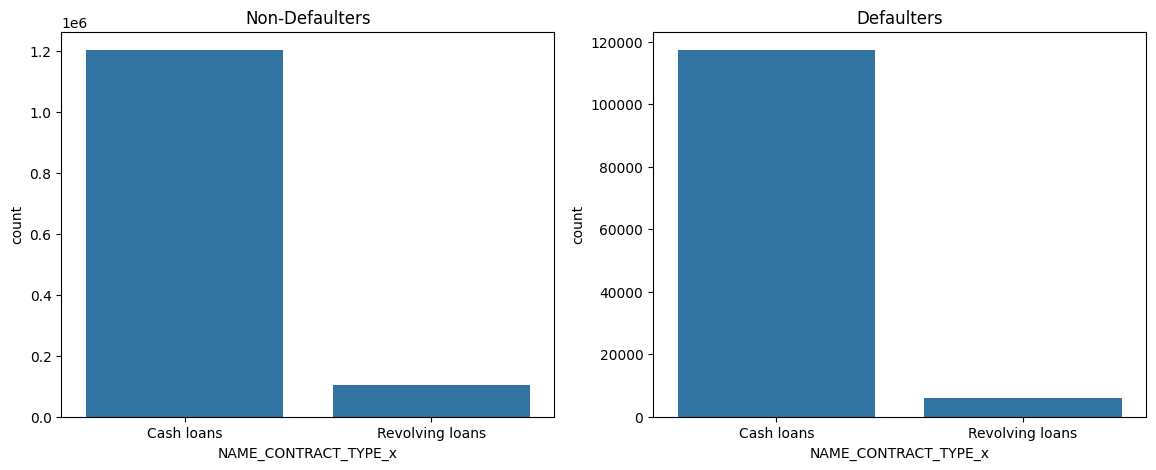

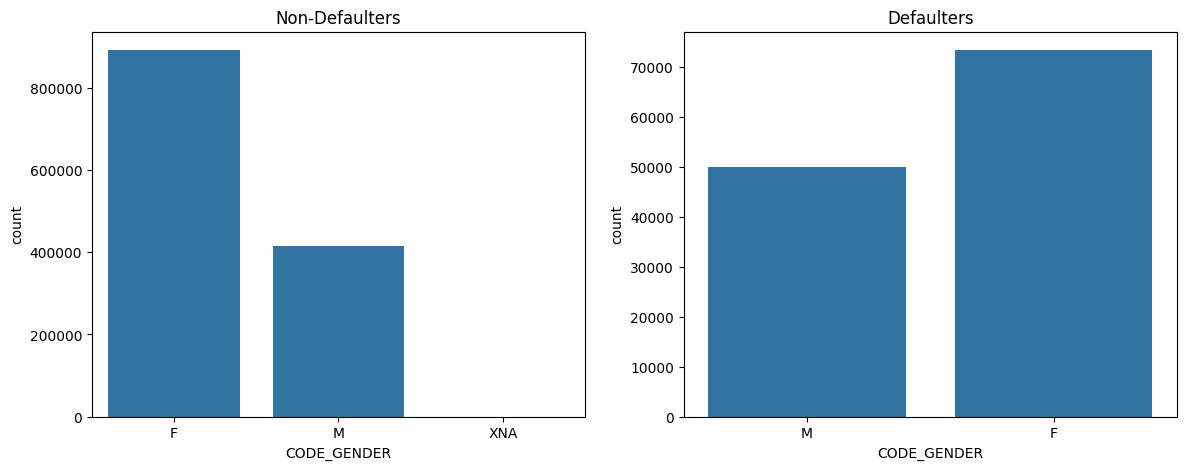

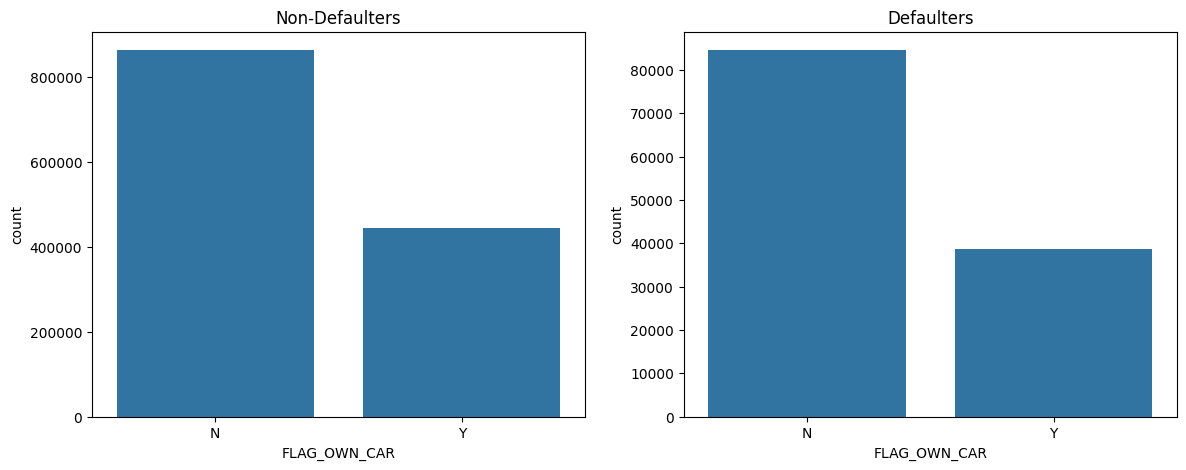

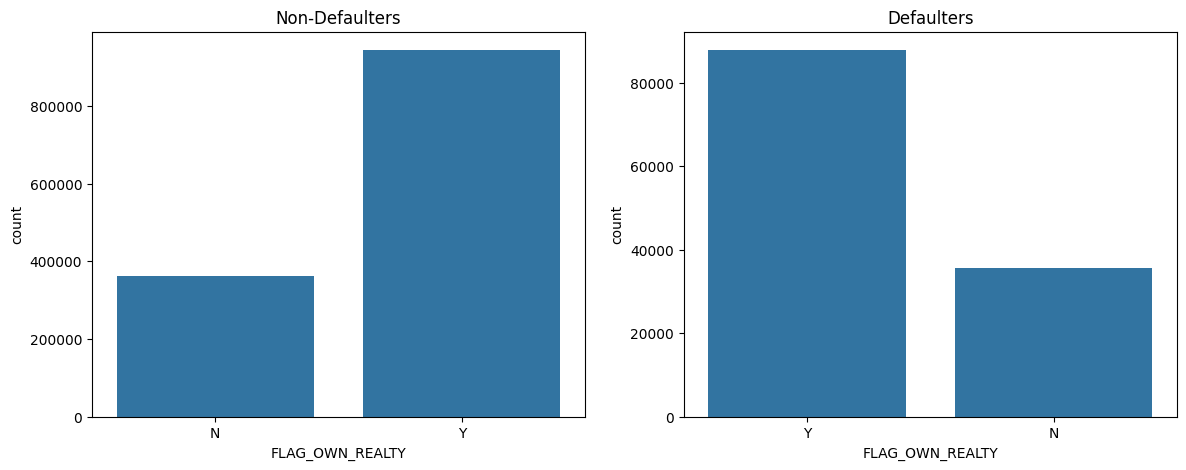

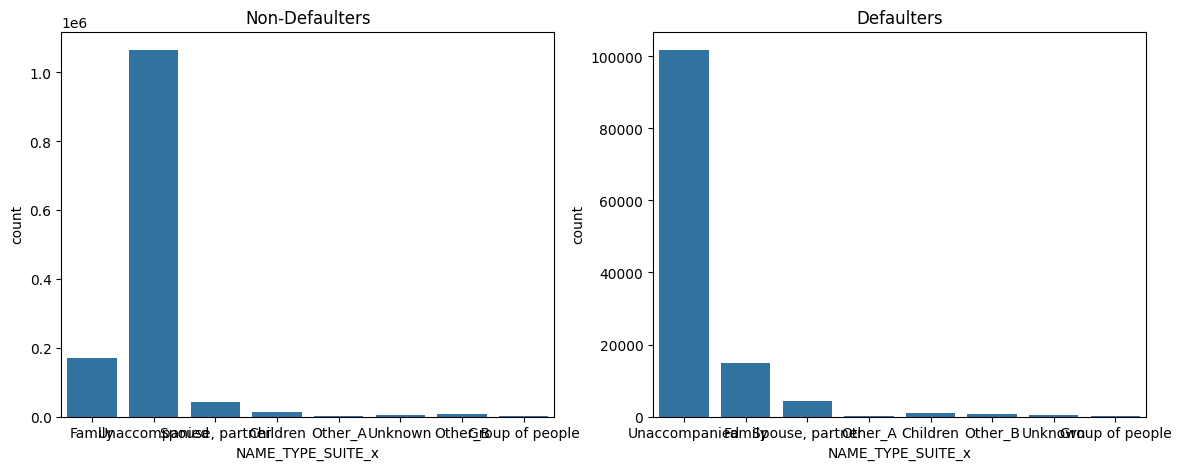

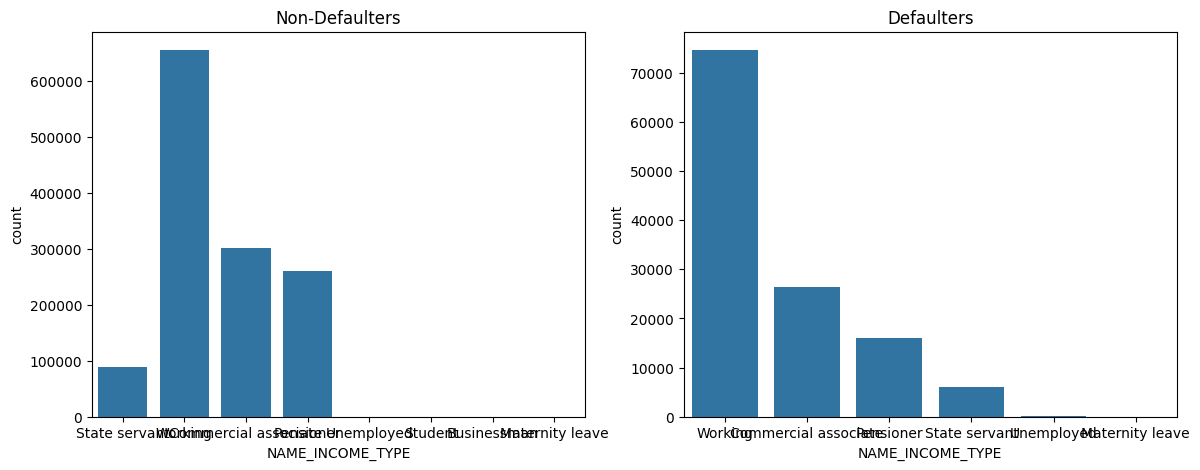

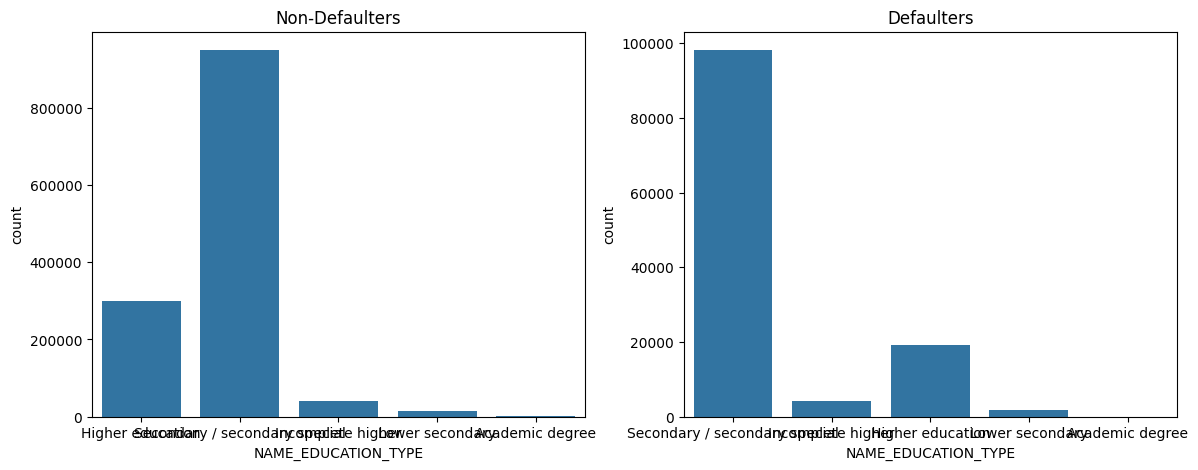

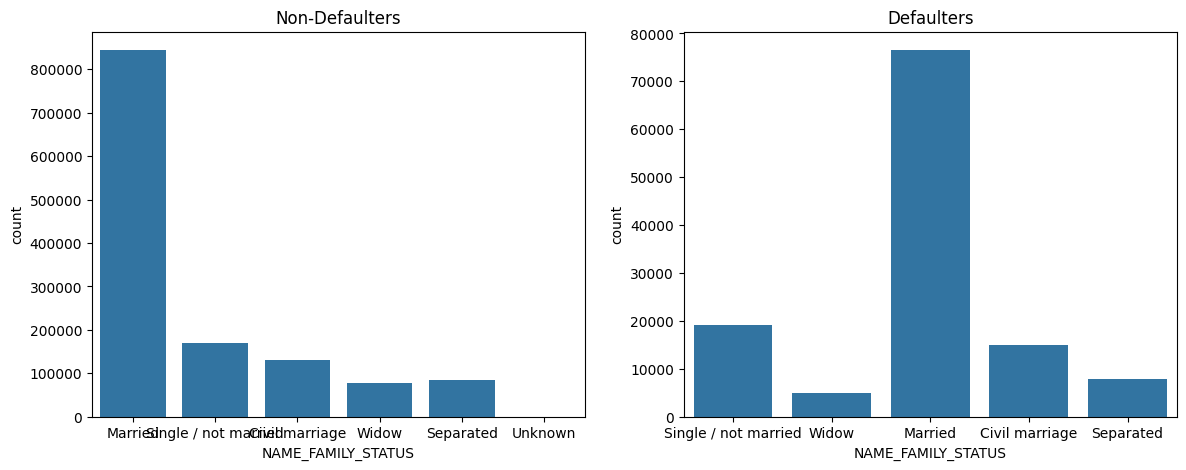

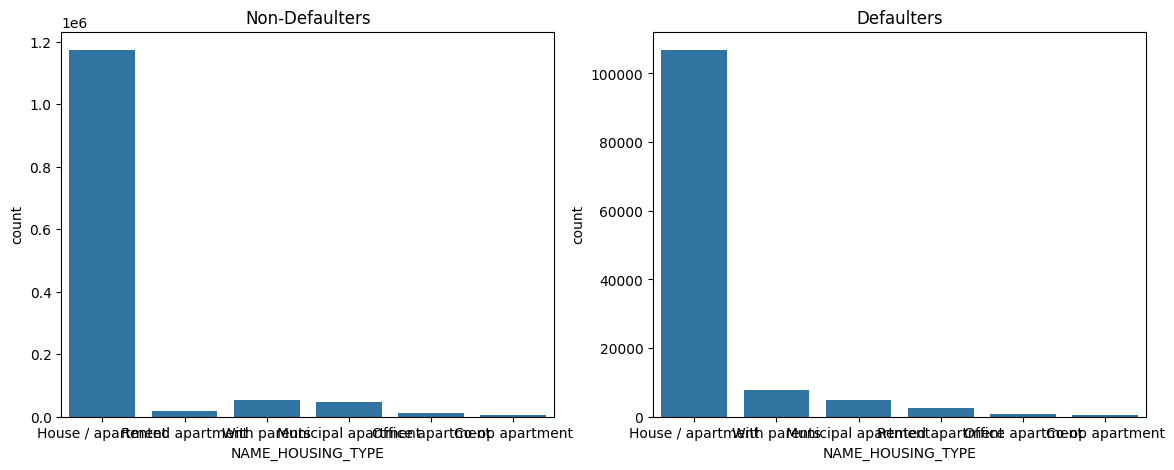

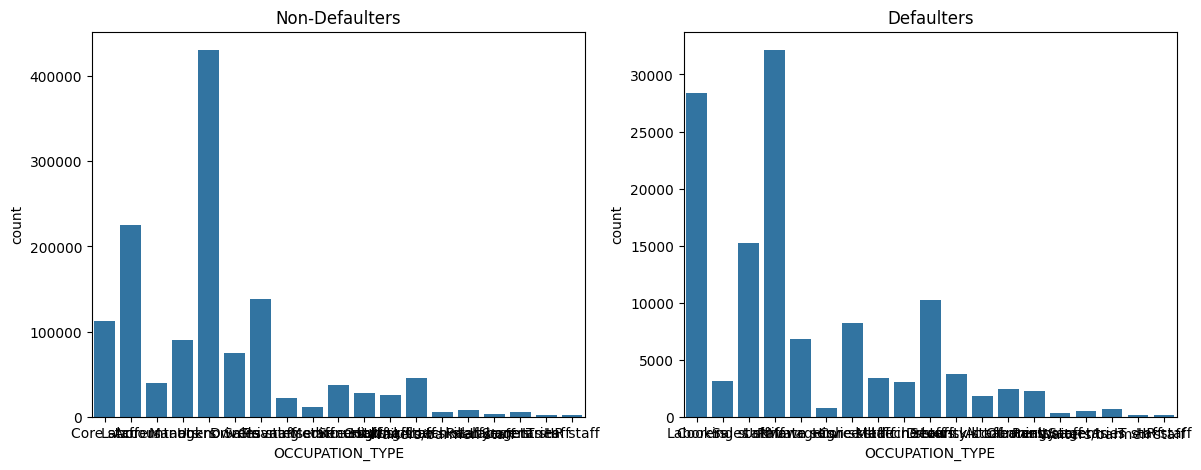

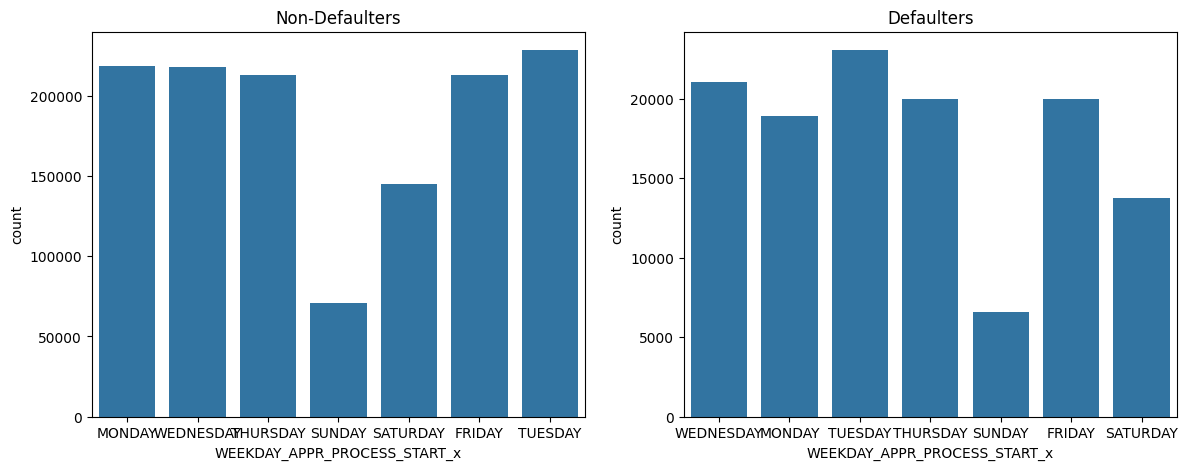

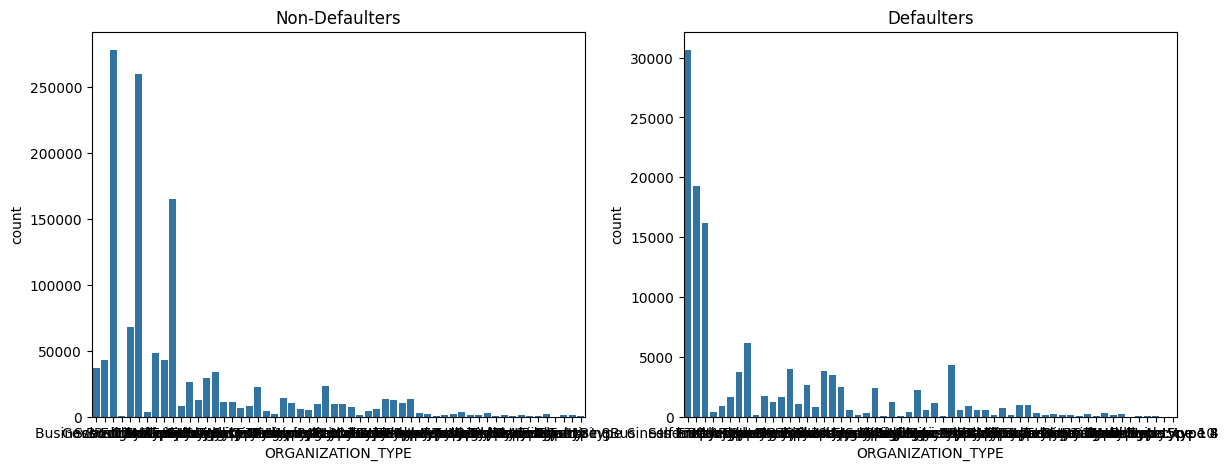

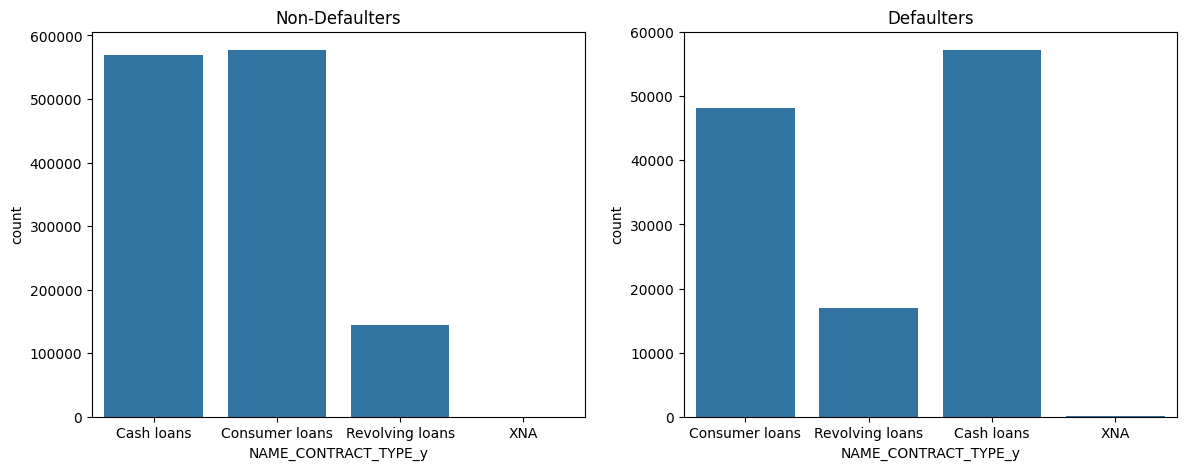

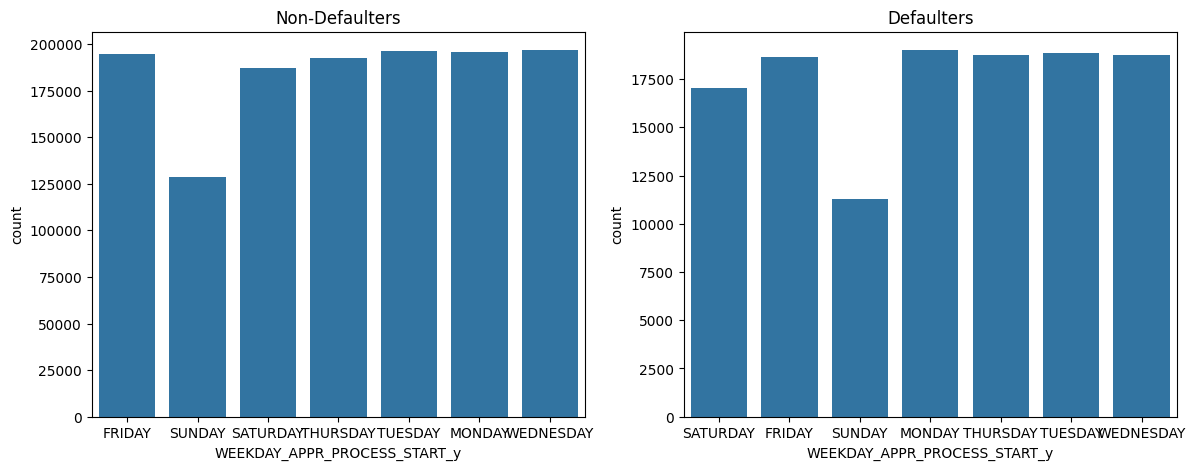

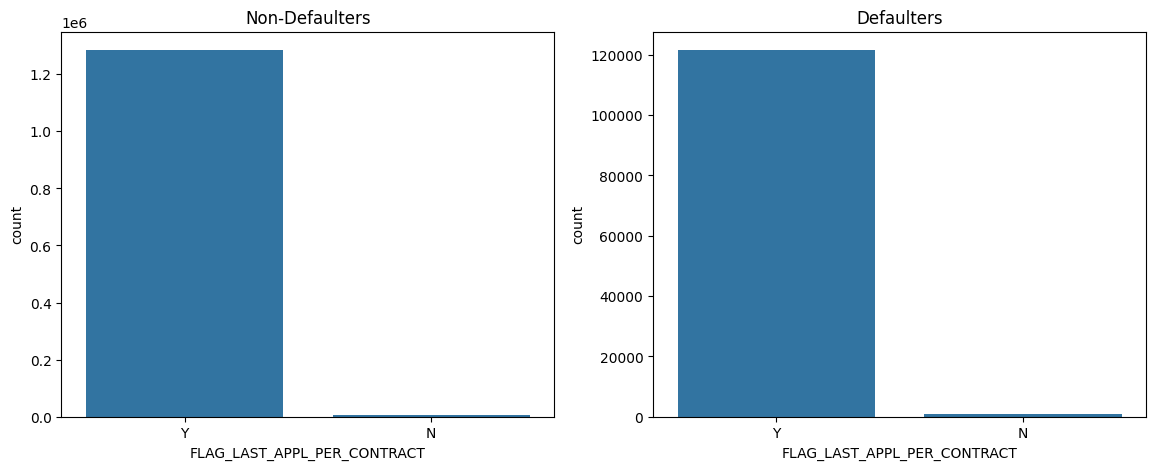

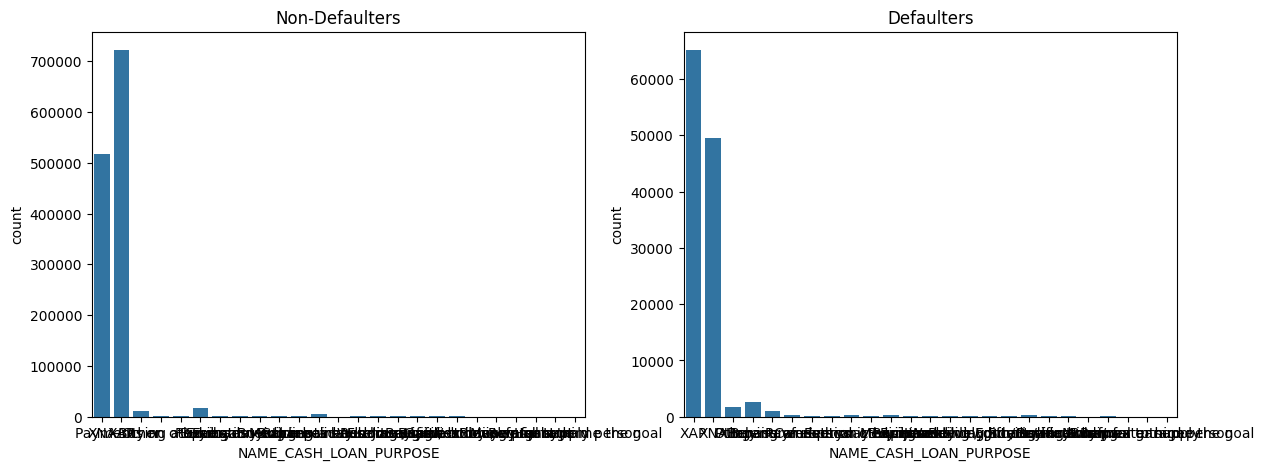

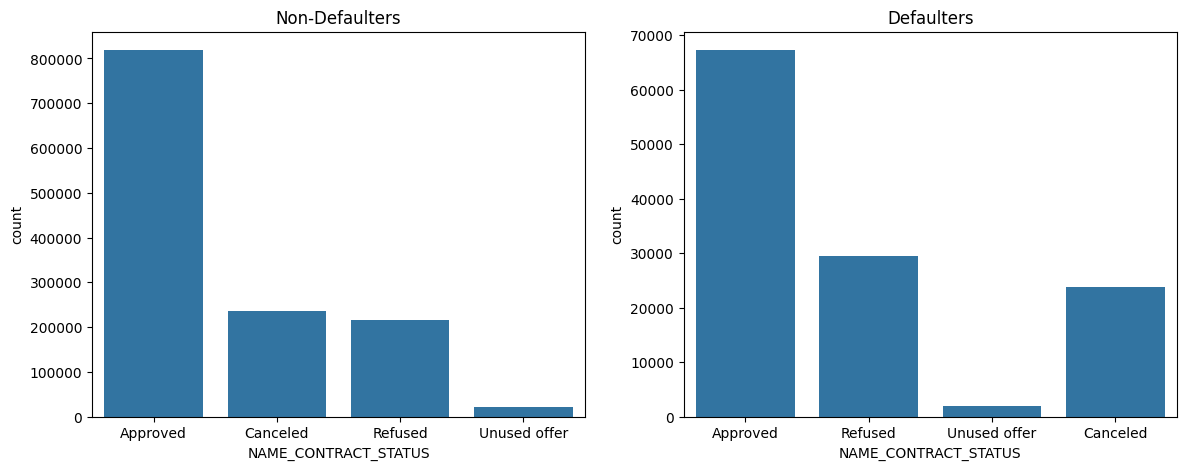

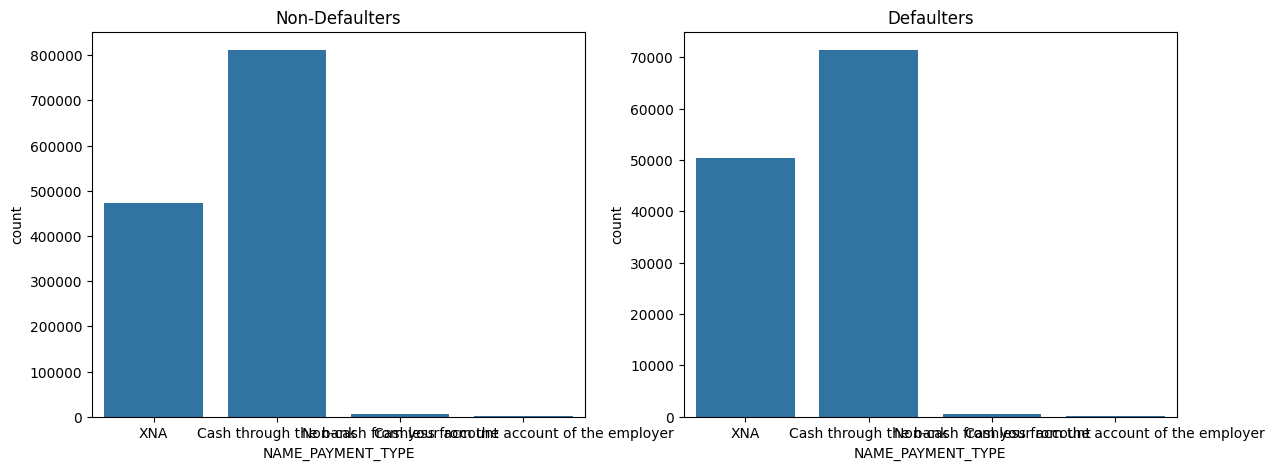

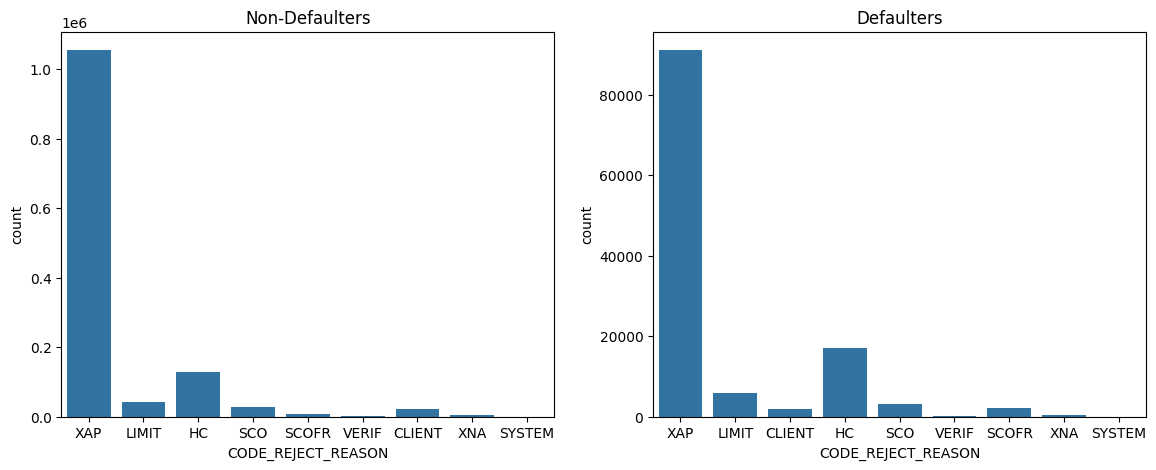

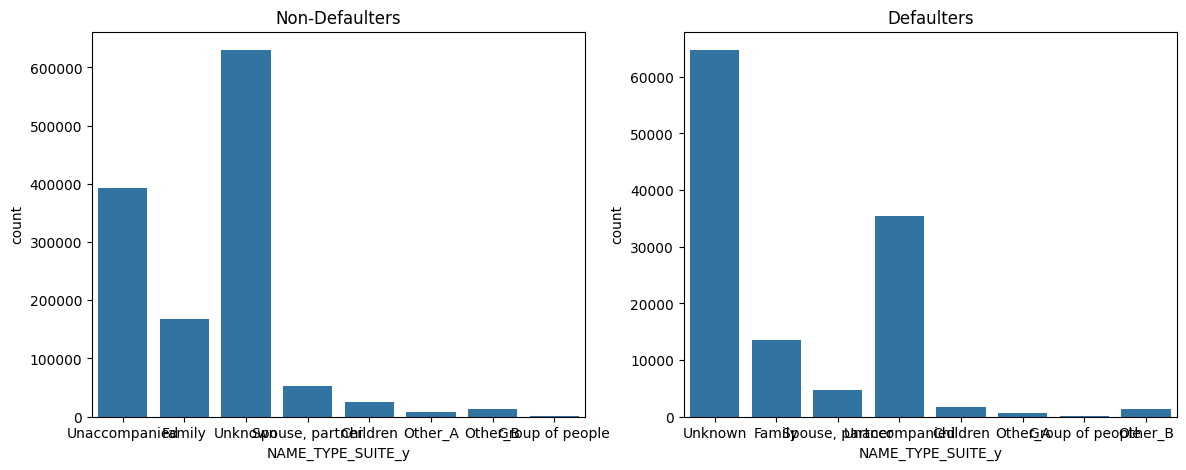

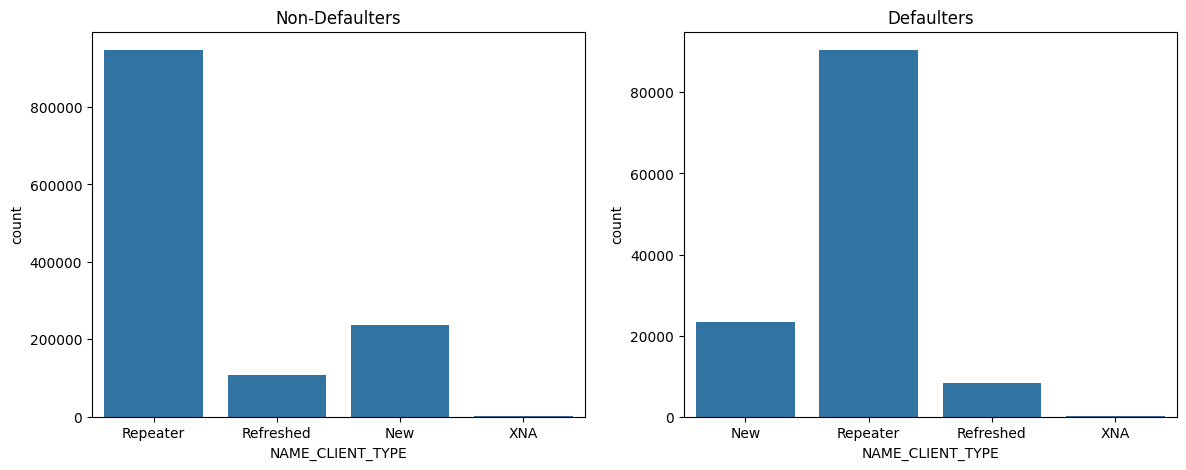

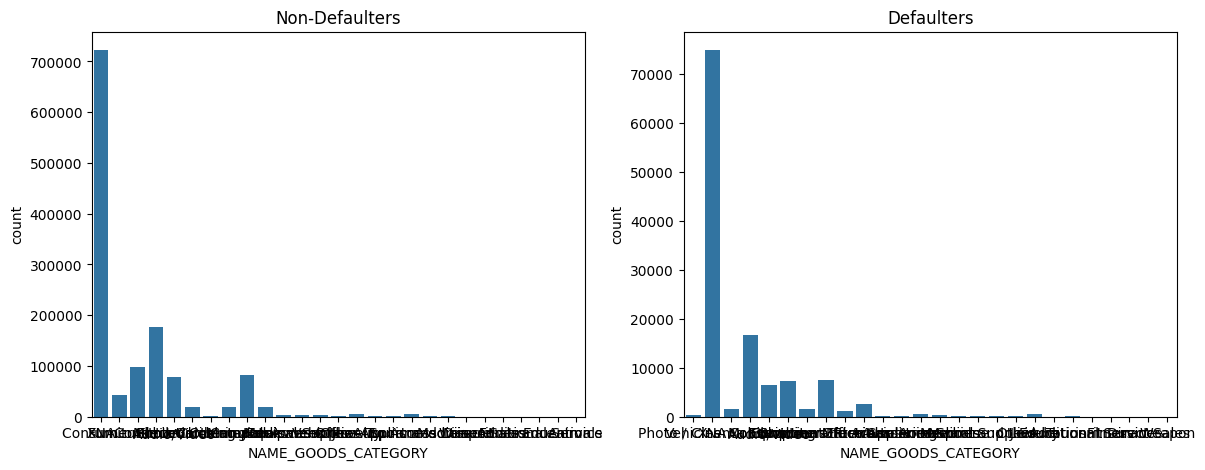

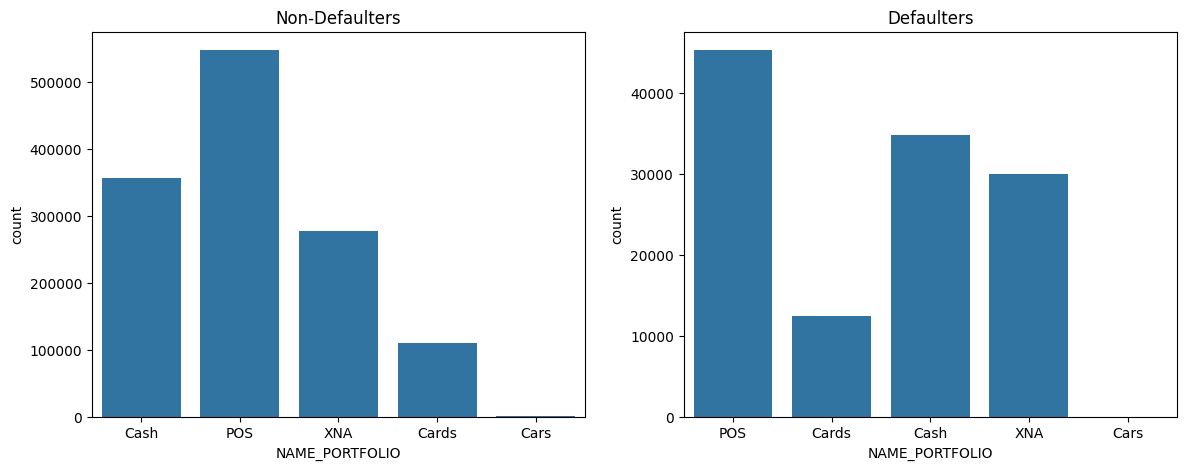

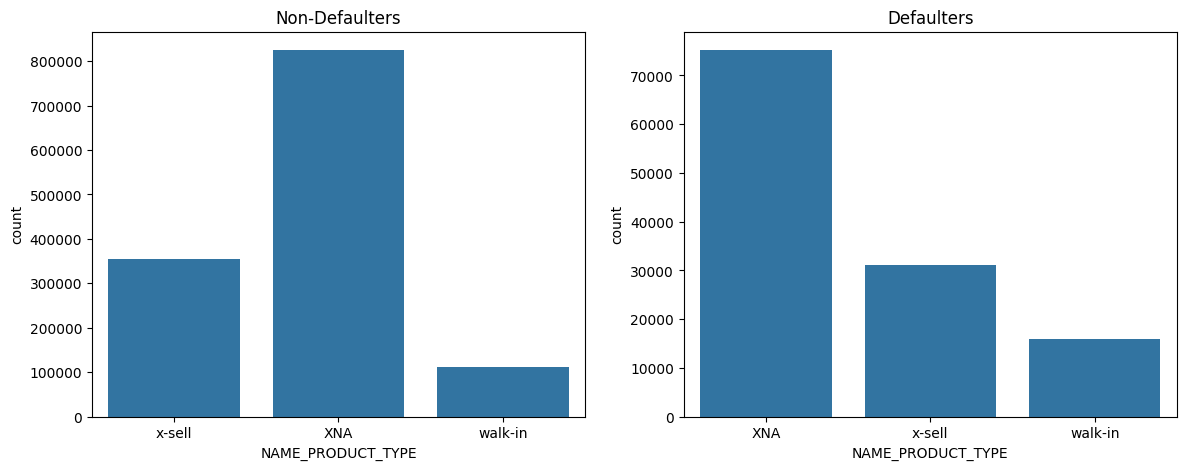

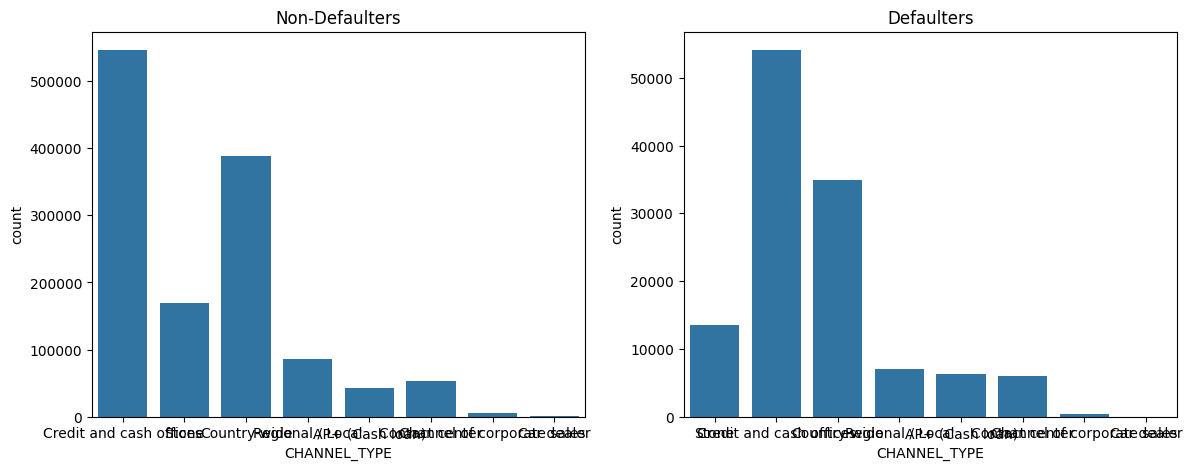

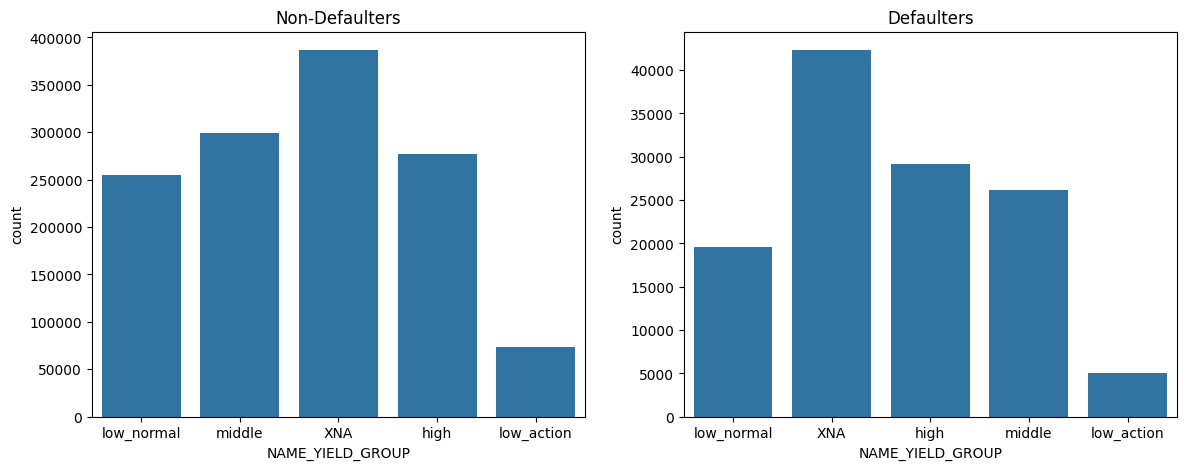

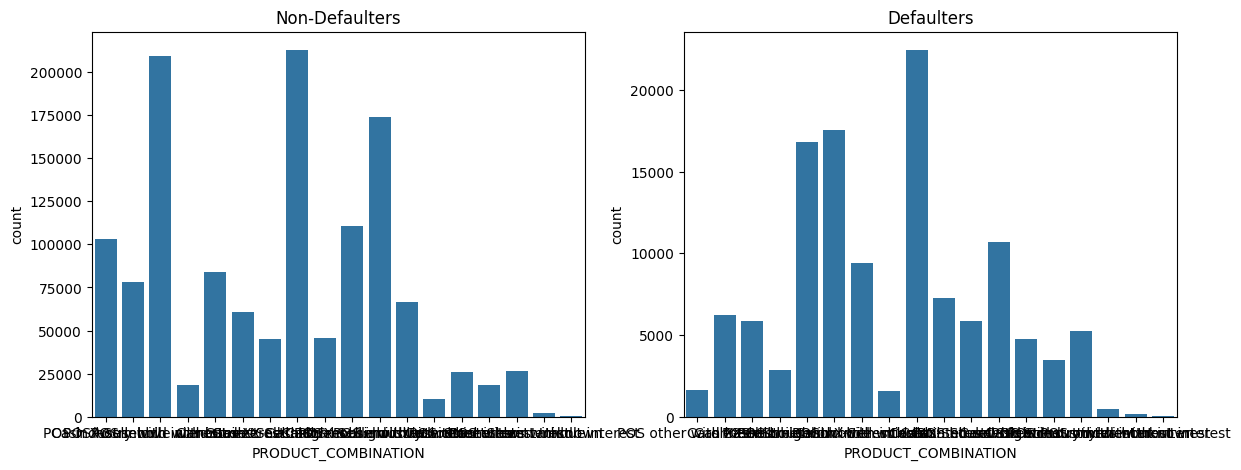

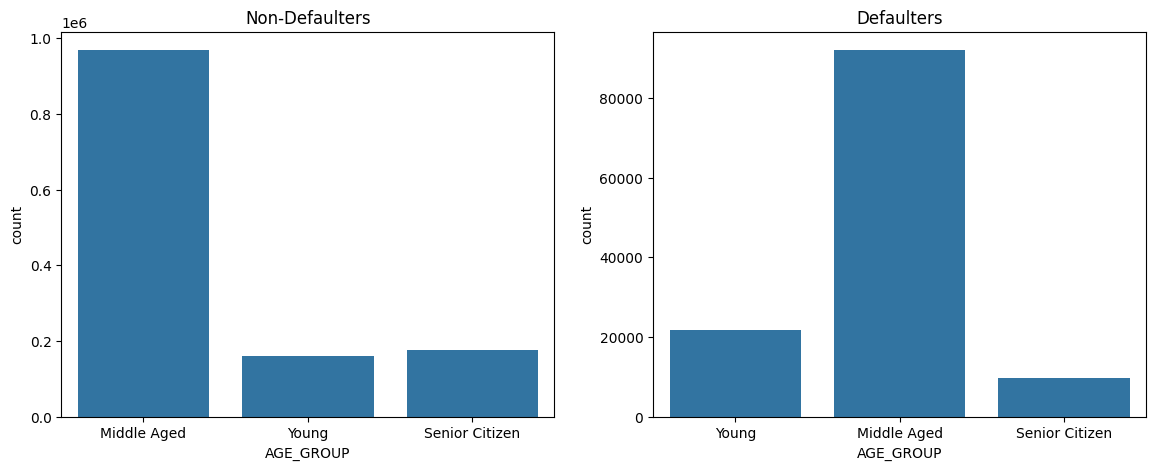

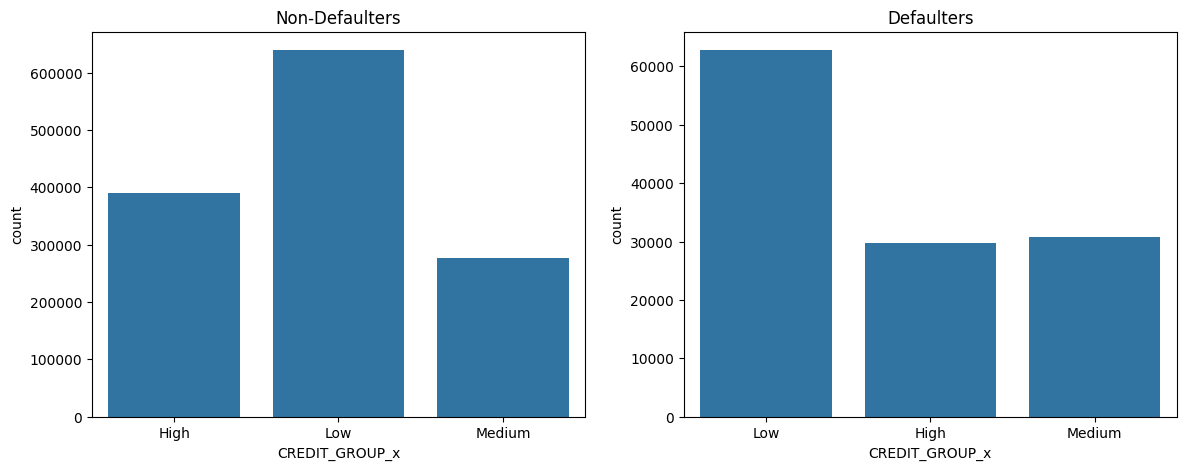

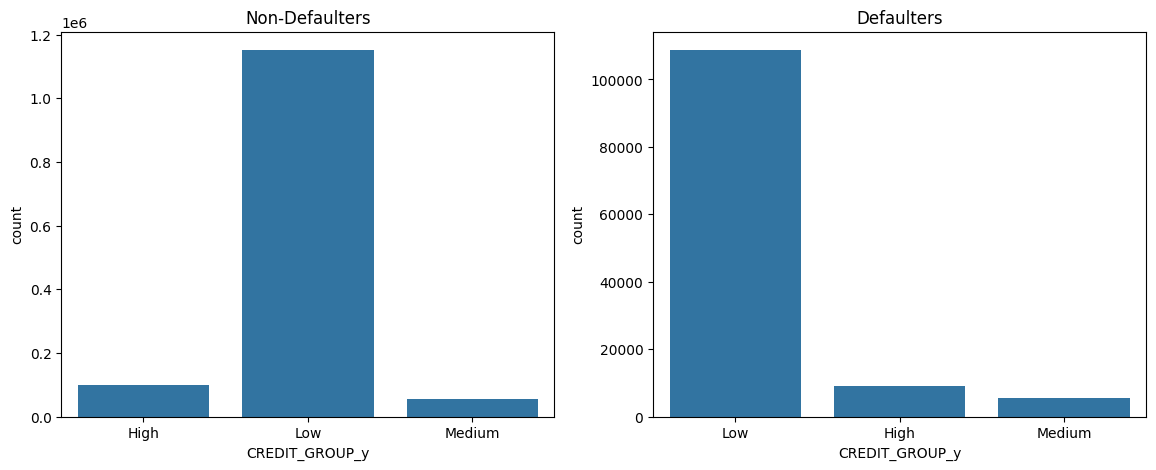

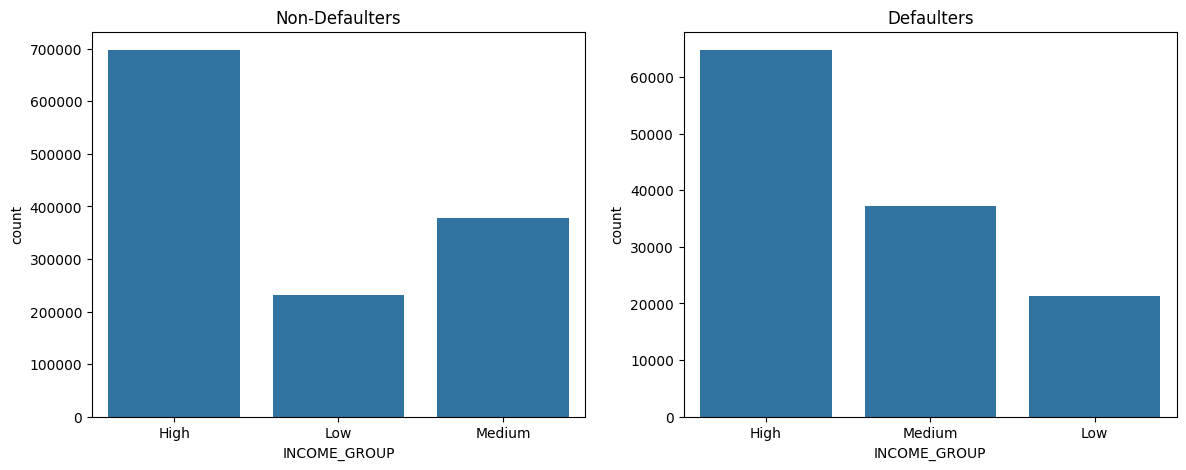

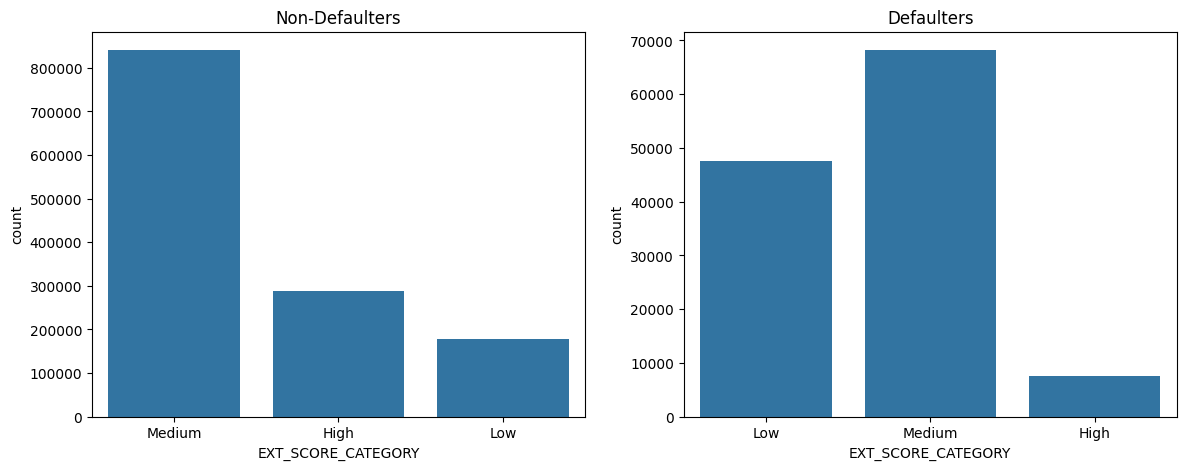

In [88]:
for column in categorical_cols:
    plt.figure(figsize=(14, 5))
    plt.subplot(1,2,1)    
    axis = sns.countplot(x = column,data=merged_data_target_0)
    plt.title("Non-Defaulters")

    plt.subplot(1,2,2) 
    ax = sns.countplot(x = column,data=merged_data_target_1)
    plt.title("Defaulters")

In [89]:
binary_cols = []
for col in merged_data.columns:
    unique_values = merged_data[col].unique()
    if len(unique_values) == 2 and col != 'TARGET':  
        binary_cols.append(col)

In [90]:
print(binary_cols)

['NAME_CONTRACT_TYPE_x', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'HAS_CAR', 'EXT_SOURCE_1_missing', 'EXT_SOURCE_3_missing']


In [91]:
for col in binary_cols:
    print(f"\nNon-Defaulters Column: {col}")
    print(merged_data_target_0[col].value_counts(normalize=True))  # Show relative frequencies
    print(f"\nDefaulters Column: {col}")
    print(merged_data_target_1[col].value_counts(normalize=True))
    print("\n")


Non-Defaulters Column: NAME_CONTRACT_TYPE_x
NAME_CONTRACT_TYPE_x
Cash loans         0.920785
Revolving loans    0.079215
Name: proportion, dtype: float64

Defaulters Column: NAME_CONTRACT_TYPE_x
NAME_CONTRACT_TYPE_x
Cash loans         0.951711
Revolving loans    0.048289
Name: proportion, dtype: float64



Non-Defaulters Column: FLAG_OWN_CAR
FLAG_OWN_CAR
N    0.660377
Y    0.339623
Name: proportion, dtype: float64

Defaulters Column: FLAG_OWN_CAR
FLAG_OWN_CAR
N    0.685528
Y    0.314472
Name: proportion, dtype: float64



Non-Defaulters Column: FLAG_OWN_REALTY
FLAG_OWN_REALTY
Y    0.722277
N    0.277723
Name: proportion, dtype: float64

Defaulters Column: FLAG_OWN_REALTY
FLAG_OWN_REALTY
Y    0.711764
N    0.288236
Name: proportion, dtype: float64



Non-Defaulters Column: FLAG_MOBIL
FLAG_MOBIL
1    9.999992e-01
0    7.652193e-07
Name: proportion, dtype: float64

Defaulters Column: FLAG_MOBIL
FLAG_MOBIL
1    1.0
Name: proportion, dtype: float64



Non-Defaulters Column: FLAG_EMP_PHONE


In [92]:
numerical_cols = [col for col in numerical_cols if col not in binary_cols]

In [93]:
for column in numerical_cols:
    percentiles = np.percentile(merged_data_target_0[column], [25, 50, 75]) 
    print(f"Percentiles for {column} (Non-Defaulters): {percentiles}")
    percentiles = np.percentile(merged_data_target_1[column], [25, 50, 75]) 
    print(f"Percentiles for {column} (Defaulters): {percentiles}")

Percentiles for CNT_CHILDREN (Non-Defaulters): [0. 0. 1.]
Percentiles for CNT_CHILDREN (Defaulters): [0. 0. 1.]
Percentiles for AMT_INCOME_TOTAL (Non-Defaulters): [112500. 157500. 211500.]
Percentiles for AMT_INCOME_TOTAL (Defaulters): [112500. 157500. 202500.]
Percentiles for AMT_CREDIT_x (Non-Defaulters): [270000. 509400. 808650.]
Percentiles for AMT_CREDIT_x (Defaulters): [284400. 495216. 729792.]
Percentiles for AMT_ANNUITY_x (Non-Defaulters): [16668.  24880.5 34596. ]
Percentiles for AMT_ANNUITY_x (Defaulters): [17775.  25326.  33043.5]
Percentiles for AMT_GOODS_PRICE_x (Non-Defaulters): [238500. 450000. 679500.]
Percentiles for AMT_GOODS_PRICE_x (Defaulters): [238500. 450000. 675000.]
Percentiles for REGION_POPULATION_RELATIVE (Non-Defaulters): [0.010032 0.01885  0.028663]
Percentiles for REGION_POPULATION_RELATIVE (Defaulters): [0.010006 0.018801 0.025164]
Percentiles for DAYS_REGISTRATION (Non-Defaulters): [-7580. -4548. -2036.]
Percentiles for DAYS_REGISTRATION (Defaulters): [

In [94]:
percentiles = np.percentile(merged_data_target_0['CNT_PAYMENT'], [25, 50, 75]) 
print(f"Percentiles for {column} (Non-Defaulters): {percentiles}")
percentiles = np.percentile(merged_data_target_1['CNT_PAYMENT'], [25, 50, 75]) 
print(f"Percentiles for {column} (Defaulters): {percentiles}")

Percentiles for EXT_SOURCE_SCORE (Non-Defaulters): [nan nan nan]
Percentiles for EXT_SOURCE_SCORE (Defaulters): [nan nan nan]


<Axes: title={'center': 'Defaulters'}, xlabel='CNT_PAYMENT', ylabel='Density'>

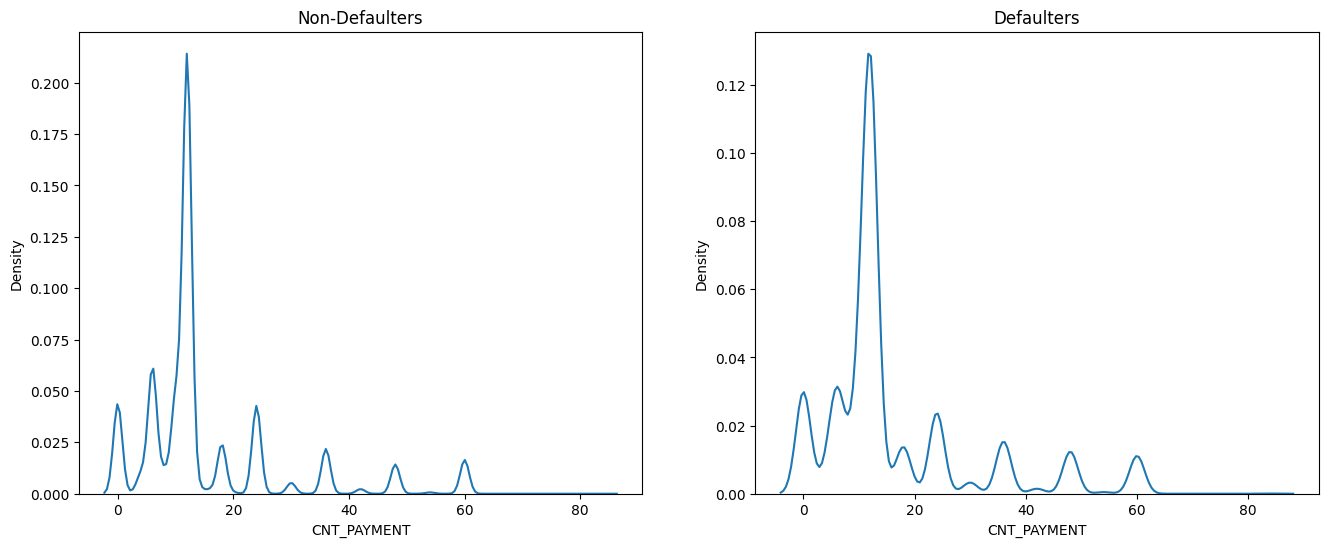

In [95]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1) 
plt.title('Non-Defaulters')
sns.distplot(merged_data_target_0['CNT_PAYMENT'],hist=False)

plt.subplot(1,2,2) 
plt.title('Defaulters')
sns.distplot(merged_data_target_1['CNT_PAYMENT'],hist=False)

#### Insights from Univariate analysis

**Top 10 attributes that are likely to be strong indicators of default risk:**

| Columns               | Non-Defaulters | Defaulters | Insight |
|------------------------|---------------|-----------|------------|
| **EXT_SCORE_CATEGORY** | 64% Medium, 22% High, 14% Low | 6% High, 55% Medium, 39% Low | External credit score; low scores indicate higher default risk. |
| **NAME_INCOME_TYPE** | 50% Working, 23% Commercial Associate, 20% Pensioner, 7% State Servant | 61% Working, 13% Pensioner, 5% State Servant | Income type affects stability; higher proportion of 'Working' among defaulters suggests instability. |
| **NAME_EDUCATION_TYPE** | 73% Secondary, 23% Higher Education | 80% Secondary, 16% Higher Education | Lower education levels correlate with higher default risk. |
| **OCCUPATION_TYPE** | 33% Unknown, 17% Laborers, 10.5% Sales Staff | 26% Unknown, 23.6% Laborers, 12.3% Sales Staff | Lower-skilled occupations (laborers, drivers) show higher default rates. |
| **AGE_GROUP** | 74% Middle Aged, 13.5% Senior Citizen, 12.4% Young | 74.6% Middle Aged, 7.8% Senior Citizen, 17.6% Young | Younger borrowers have higher default risk due to financial instability, lower savings, and limited credit history. |
| **AMT_INCOME_TOTAL** | 112,500 (25th), 157,500 (Median), 211,500 (75th) | 112,500 (25th), 157,500 (Median), 202,500 (75th) | Higher-income individuals are underrepresented among defaulters. |
| **AMT_CREDIT_x** | 270,000 (25th), 509,400 (Median), 808,650 (75th) | 284,400 (25th), 495,216 (Median), 729,792 (75th) | Lower median and 75th percentile credit amounts among defaulters suggest lenders are cautious. |
| **AMT_ANNUITY_x** | 16,668 (25th), 24,880.5 (Median), 34,596 (75th) | 17,775 (25th), 25,326 (Median), 33,043.5 (75th) | Higher annuity burden may contribute to default risk. |
| **NAME_CONTRACT_STATUS** | 63.4% Approved, 16.7% Refused, 18.3% Canceled | 55% Approved, 24% Refused, 19% Canceled | More refusals in previous applications indicate higher future default risk. |
| **CNT_PAYMENT** | Modal values concentrated around longer terms, with a prominent peak near 20 | Modal values also around longer terms, but with a less prominent peak near 20 and higher density at shorter terms | Term of previous credit; Defaulters tend to have shorter repayment terms more often, which may indicate financial strain or that lenders impose stricter conditions on high-risk borrowers.|


#### Bivariate Analysis

Correlation of numerical columns

In [96]:
numerical_correlation_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT_x','AMT_ANNUITY_x','CNT_PAYMENT']

In [97]:
numerical_correlation_target_0 = merged_data_target_0[numerical_correlation_cols]
numerical_correlation_target_0.head()

,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,CNT_PAYMENT
1,270000.0,1293502.5,35698.5,12.0
2,270000.0,1293502.5,35698.5,6.0
3,270000.0,1293502.5,35698.5,12.0
4,67500.0,135000.0,6750.0,4.0
5,135000.0,312682.5,29686.5,48.0


In [98]:
numerical_correlation_target_1 = merged_data_target_1[numerical_correlation_cols]
numerical_correlation_target_1.head()

,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,CNT_PAYMENT
0,202500.0,406597.5,24700.5,24.0
97,112500.0,979992.0,27076.5,NaN
163,202500.0,1193580.0,35028.0,0.0
164,202500.0,1193580.0,35028.0,24.0
165,202500.0,1193580.0,35028.0,36.0


In [99]:
numerical_correlation_target_0.corr()

,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,CNT_PAYMENT
AMT_INCOME_TOTAL,1.000000,0.326858,0.404974,0.031897
AMT_CREDIT_x,0.326858,1.000000,0.760244,0.035423
AMT_ANNUITY_x,0.404974,0.760244,1.000000,-0.005322
CNT_PAYMENT,0.031897,0.035423,-0.005322,1.000000


<Axes: >

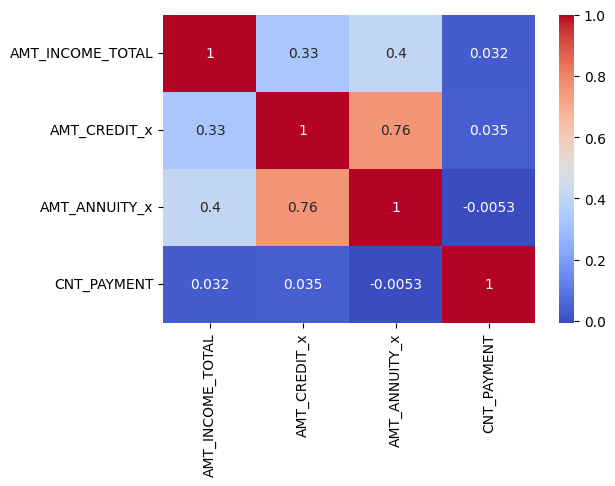

In [100]:
plt.figure(figsize=(6,4))
sns.heatmap(numerical_correlation_target_0.corr(),cmap="coolwarm",annot=True)

In [101]:
numerical_correlation_target_1.corr()

,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,CNT_PAYMENT
AMT_INCOME_TOTAL,1.000000,0.043771,0.056114,0.004036
AMT_CREDIT_x,0.043771,1.000000,0.746170,0.049746
AMT_ANNUITY_x,0.056114,0.746170,1.000000,0.007246
CNT_PAYMENT,0.004036,0.049746,0.007246,1.000000


<Axes: >

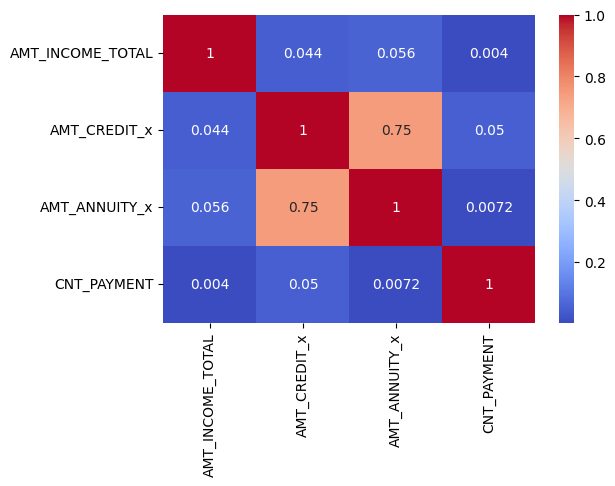

In [102]:
plt.figure(figsize=(6,4))
sns.heatmap(numerical_correlation_target_1.corr(),cmap="coolwarm",annot=True)

##### Findings

AMT_CREDIT_x and AMT_ANNUITY_x variables are highly correlated in both the defaulter and non-defaulter datasets, suggesting underlying relationships that are independent of default outcome.

This strong correlation means that loan size naturally determines payment size—it’s not a special pattern among defaulters or non-defaulters.

**Analysis on categorical columns**

In [103]:
categorical_correlation_cols = ['EXT_SCORE_CATEGORY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','OCCUPATION_TYPE','AGE_GROUP','NAME_CONTRACT_STATUS']

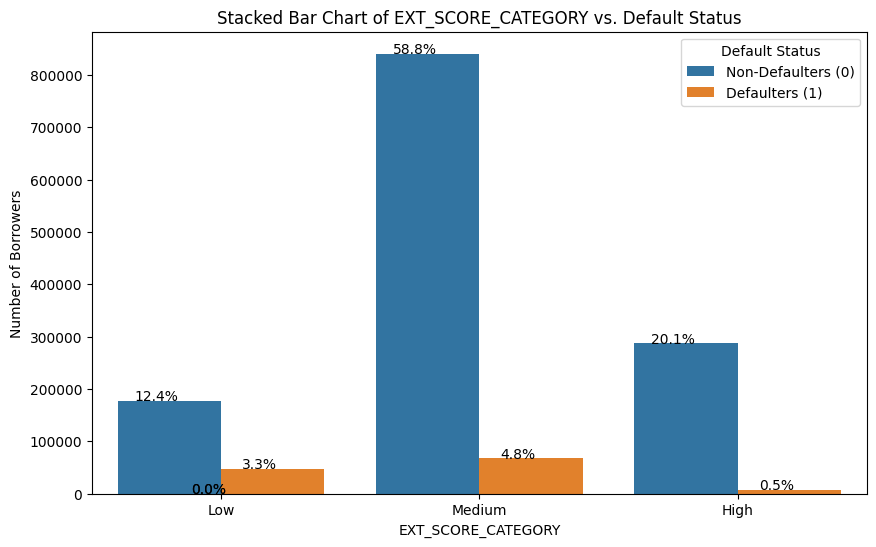

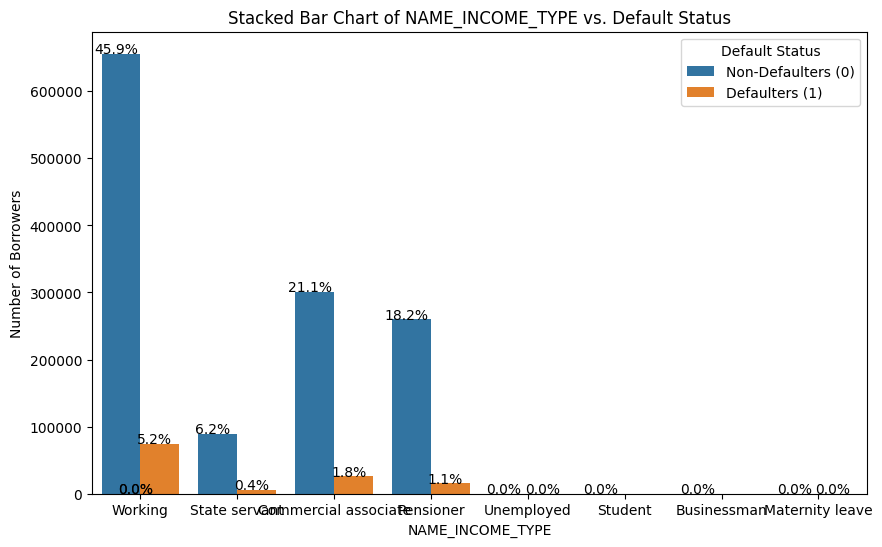

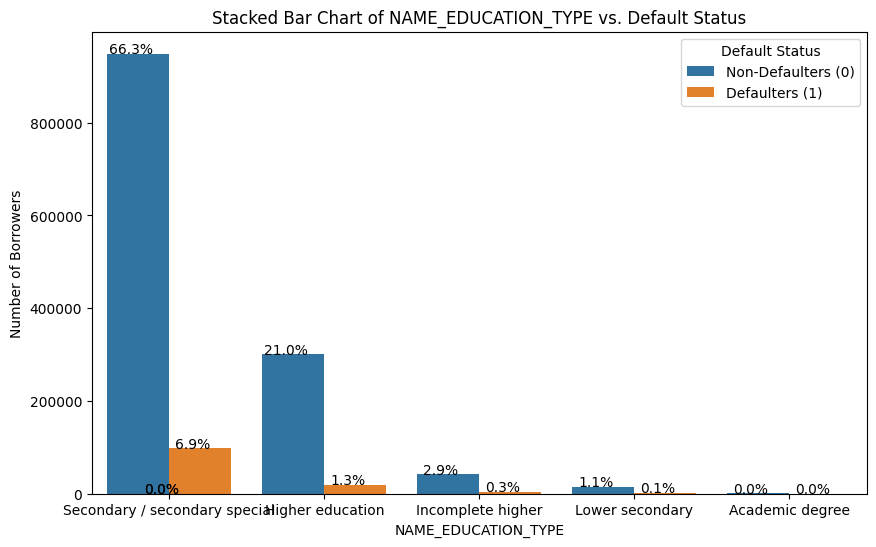

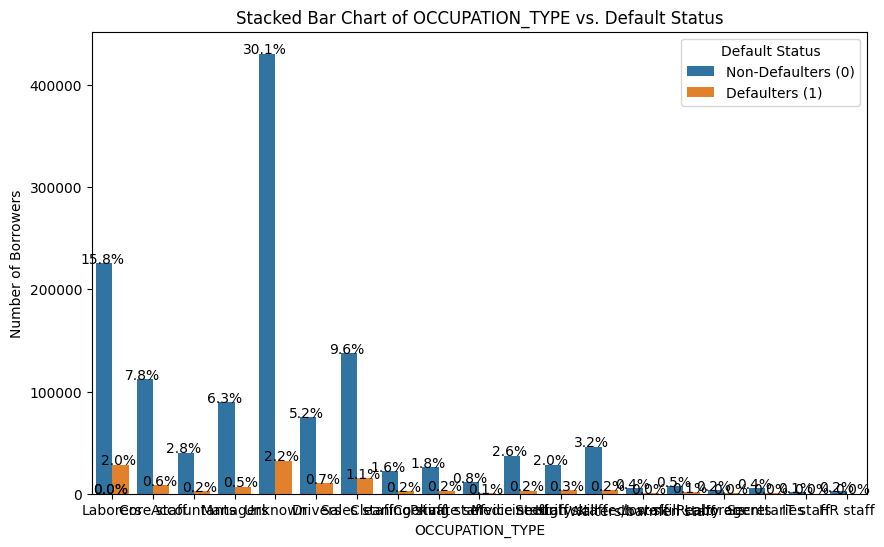

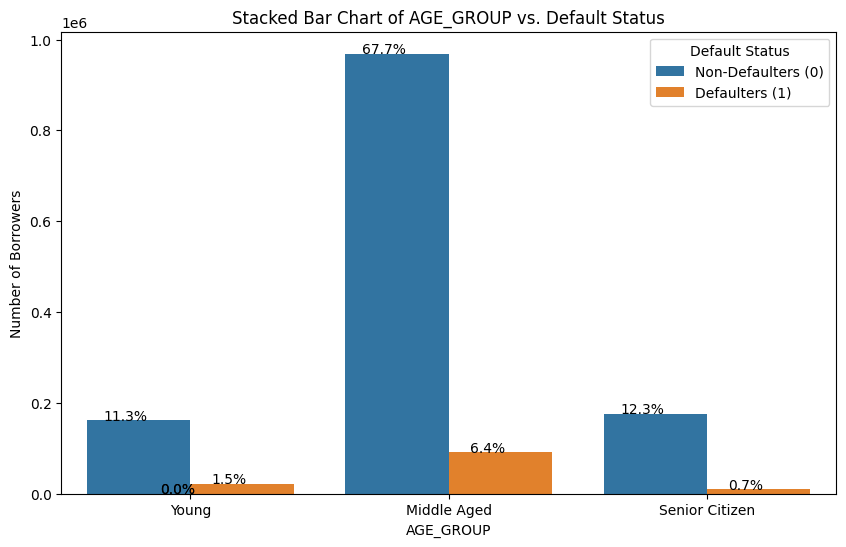

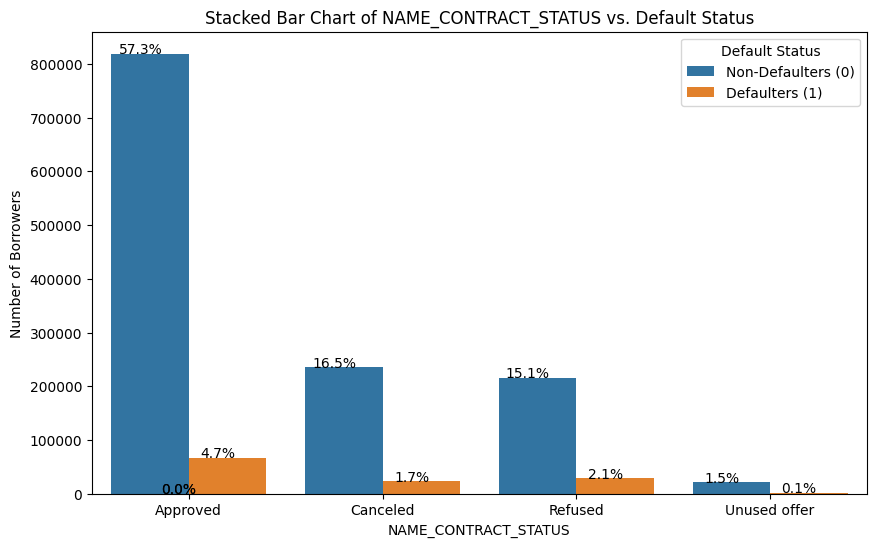

In [104]:
for col in categorical_correlation_cols:
    plt.figure(figsize=(10, 6))
    total = len(merged_data)
    ax = sns.countplot(x=col, hue="TARGET", data=merged_data)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), ha='center')
    plt.title(f'Stacked Bar Chart of {col} vs. Default Status')
    plt.xlabel(col)
    plt.ylabel('Number of Borrowers')
    plt.legend(title='Default Status', labels=['Non-Defaulters (0)', 'Defaulters (1)'])  
    plt.show()

**Comparing a Categorical and a Numeric Variable**

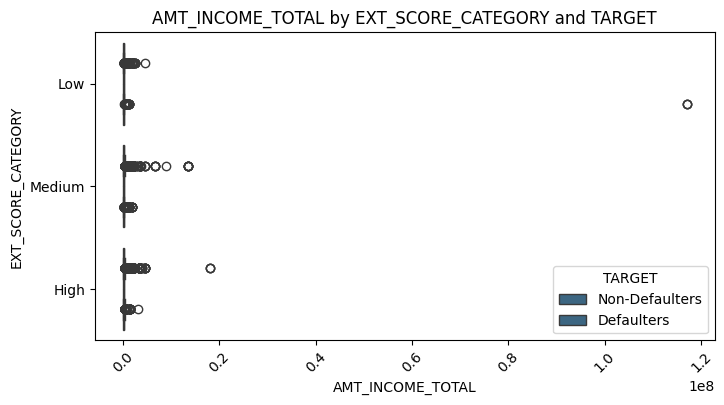

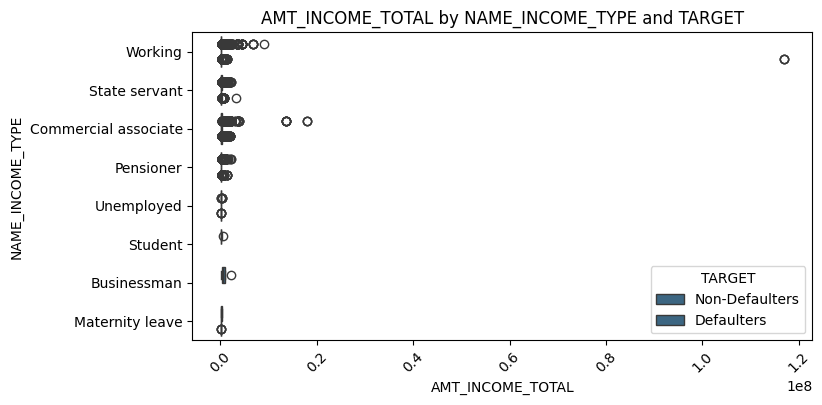

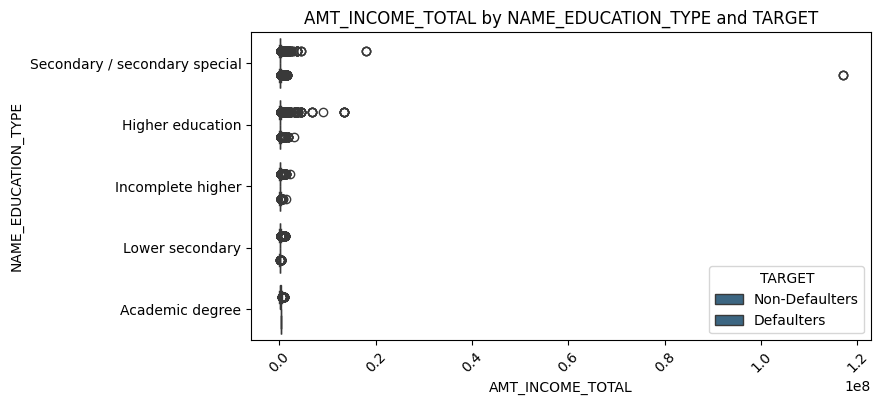

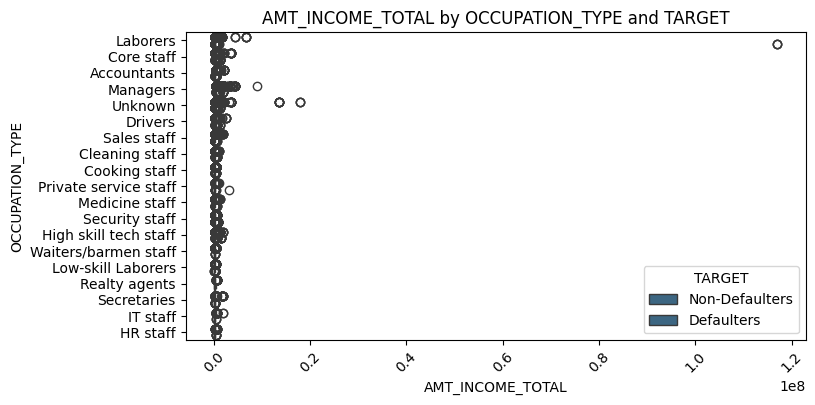

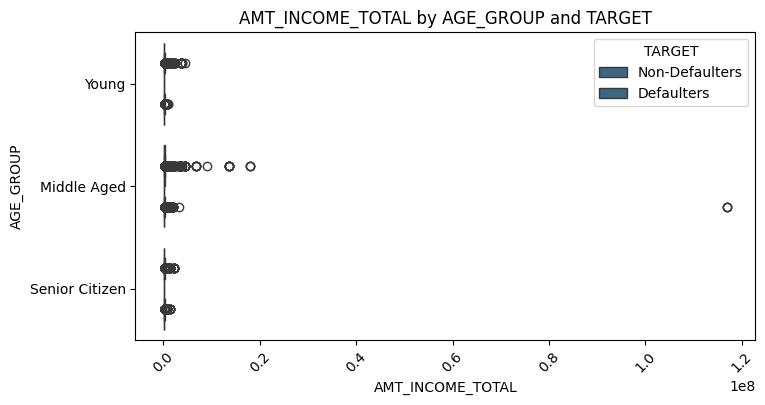

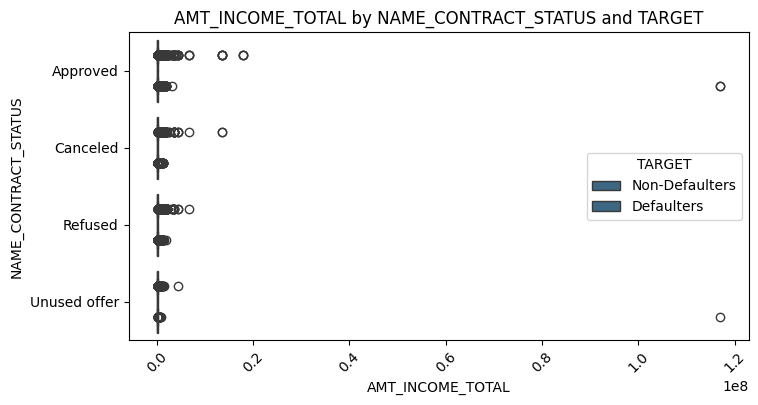

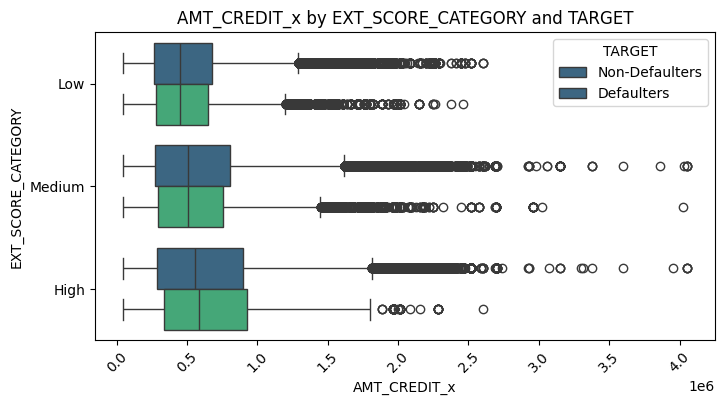

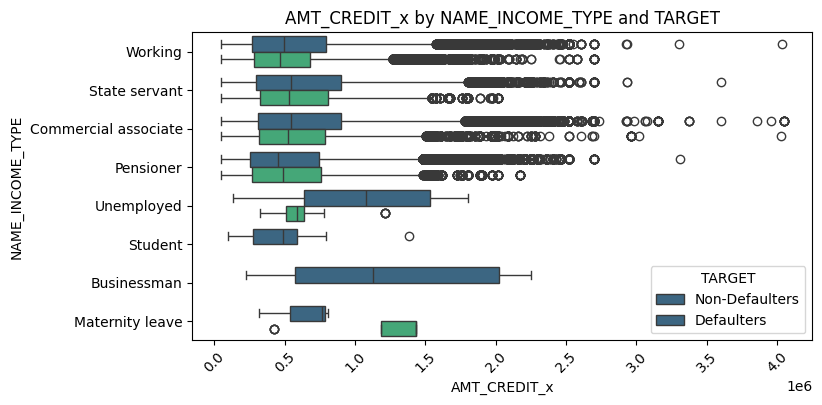

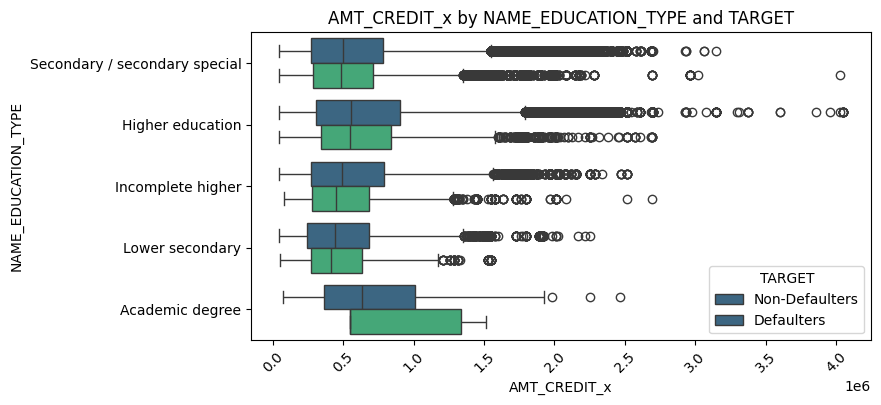

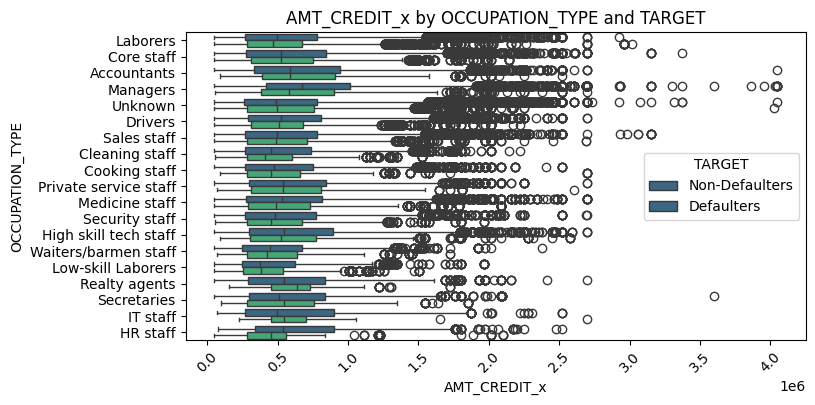

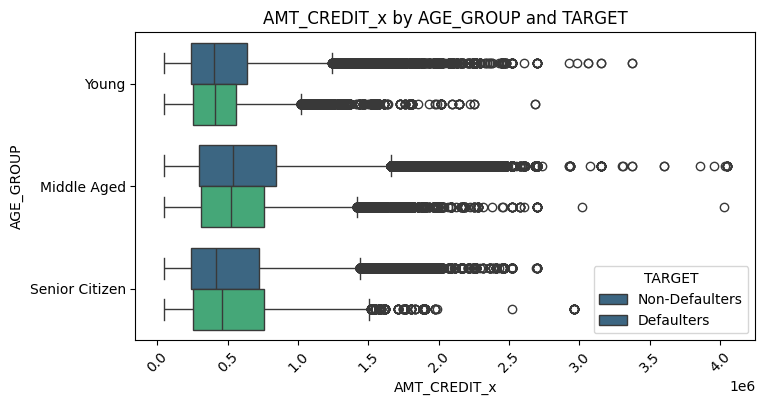

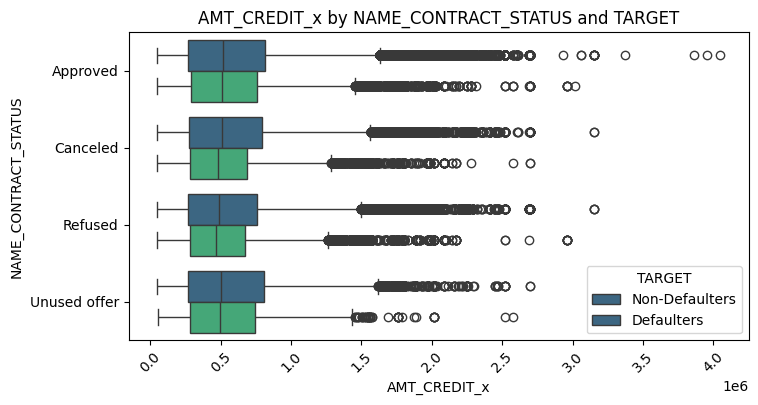

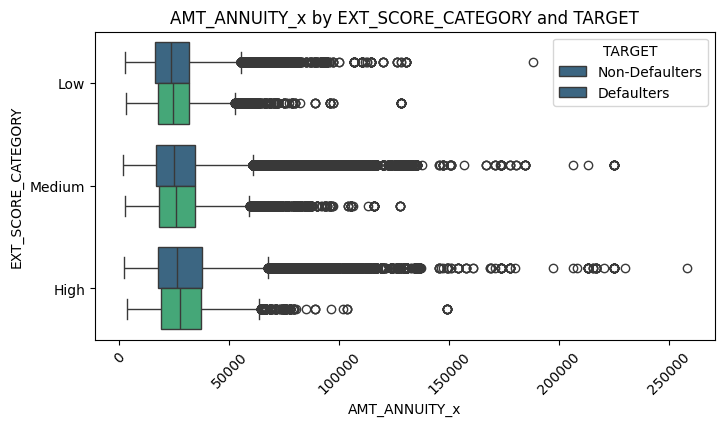

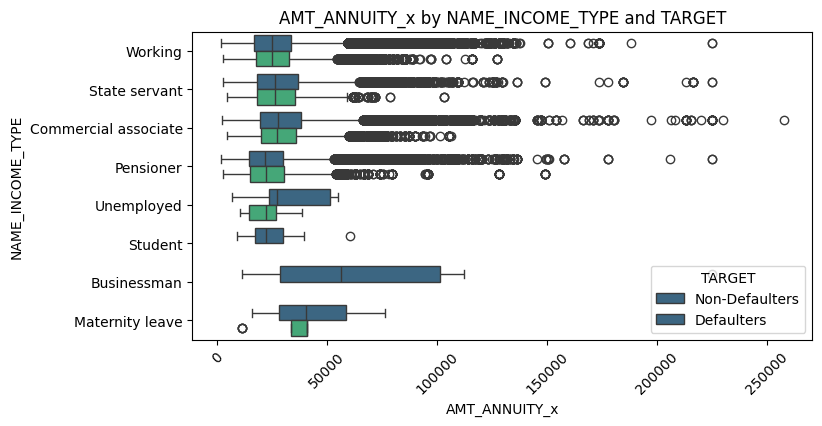

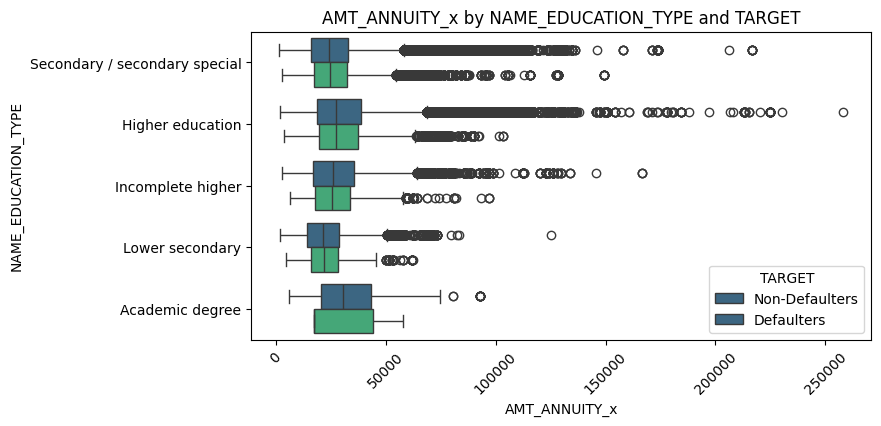

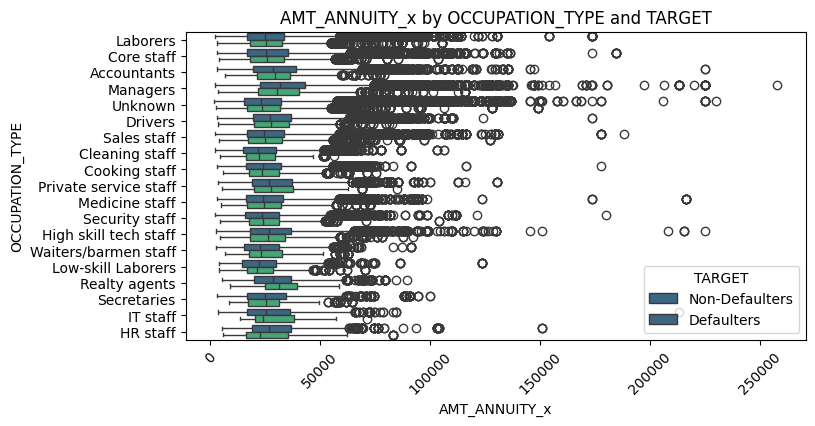

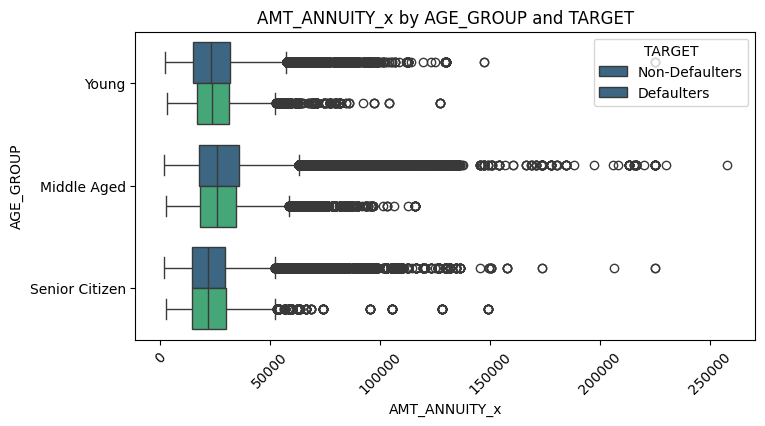

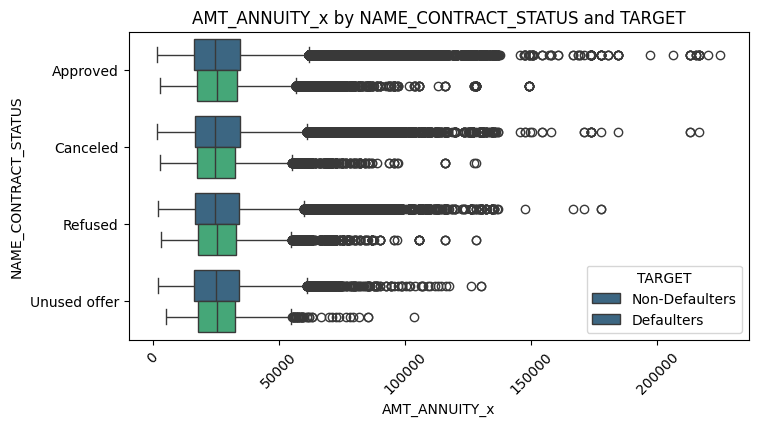

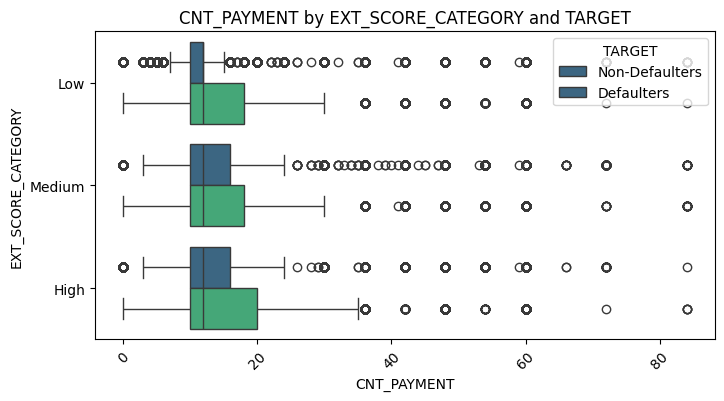

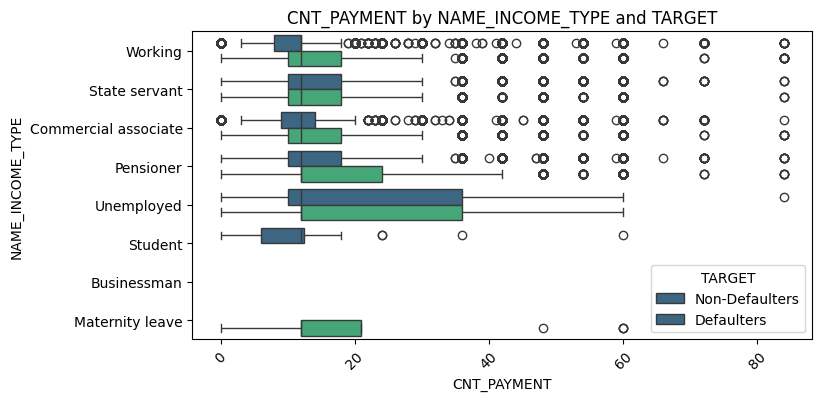

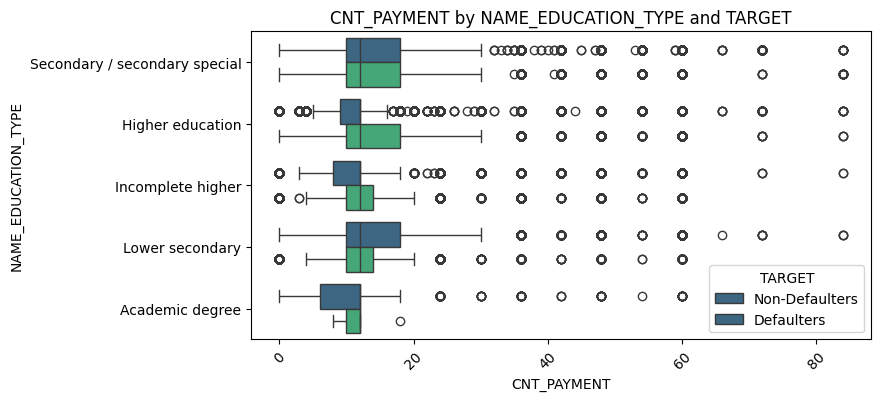

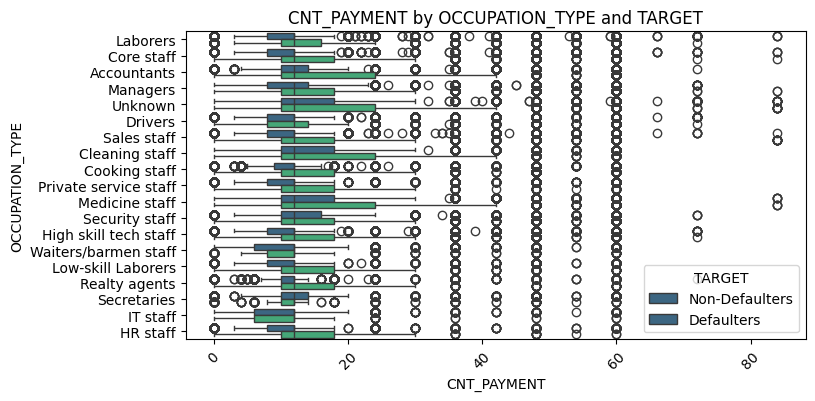

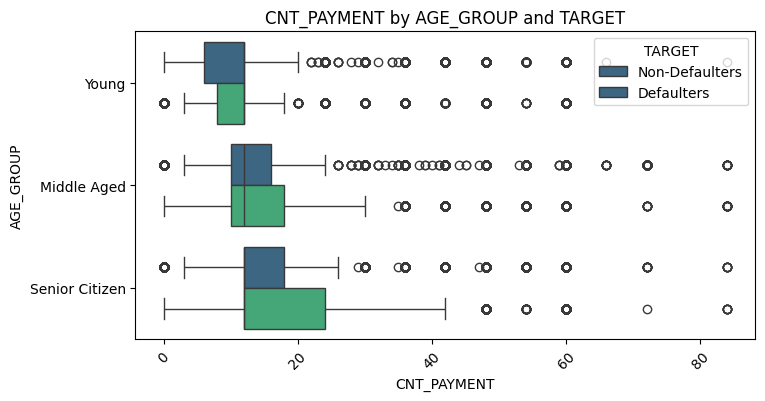

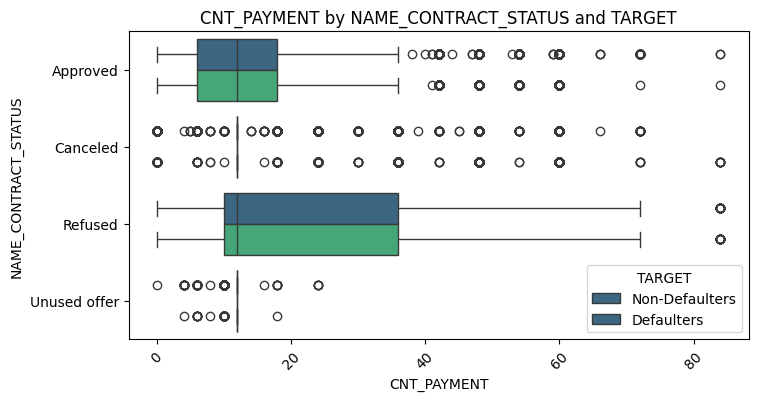

In [105]:
for column1 in numerical_correlation_cols:
    for column2 in categorical_correlation_cols:
        plt.figure(figsize=(8,4))
        sns.boxplot(x=column1, y=column2, hue='TARGET', data=merged_data, palette='viridis')
        plt.title(column1 + ' by ' + column2 + ' and TARGET')
        plt.xlabel(column1)
        plt.ylabel(column2)
        plt.legend(title='TARGET', labels=['Non-Defaulters', 'Defaulters'])
        plt.xticks(rotation=45)
        plt.show()

In [106]:
for column1 in numerical_correlation_cols:
    for column2 in categorical_correlation_cols:
        
        summary_stats = merged_data.groupby([column2, 'TARGET'])[column1].describe()

        print(f"Summary Statistics for {column1} by {column2} and TARGET:")
        print(summary_stats)
        print("-" * 50)  

      
        medians = merged_data.groupby([column2, 'TARGET'])[column1].median()
        q25 = merged_data.groupby([column2, 'TARGET'])[column1].quantile(0.25)
        q75 = merged_data.groupby([column2, 'TARGET'])[column1].quantile(0.75)
        counts = merged_data.groupby([column2, 'TARGET'])[column1].count()

        print("Medians:")
        print(medians)
        print("25th Percentiles:")
        print(q25)
        print("75th Percentiles:")
        print(q75)
        print("Counts:")
        print(counts)
        print("*"*50)

Summary Statistics for AMT_INCOME_TOTAL by EXT_SCORE_CATEGORY and TARGET:
                              count           mean            std      min  \
EXT_SCORE_CATEGORY TARGET                                                    
High               0       288172.0  182536.552201  121578.614371  27000.0   
                   1         7575.0  179173.053267  109643.132338  27000.0   
Low                0       177903.0  165567.078634   84147.401114  26100.0   
                   1        47550.0  171793.509085  931307.086420  27000.0   
Medium             0       840740.0  172494.041000  102485.301885  25650.0   
                   1        68215.0  171144.591138   88730.396058  25650.0   

                                25%       50%       75%          max  
EXT_SCORE_CATEGORY TARGET                                             
High               0       112500.0  157500.0  225000.0   18000090.0  
                   1       112500.0  157500.0  225000.0    3150000.0  
Low              

#### Insights from Bivariate Analysis

| **Segment** | **Observations** | **Insights** |
|------------------|---------------------|----------------------------------|
| **AMT_INCOME_TOTAL by EXT_SCORE_CATEGORY** | Medians are ~157,500 for both TARGET groups; the 75th percentile is slightly lower for defaulters in Medium/Low categories. | Higher-income individuals are underrepresented among defaulters, particularly in lower external score segments, underscoring the importance of external credit scoring. |
| **AMT_INCOME_TOTAL by NAME_INCOME_TYPE** | Non-defaulters are spread across “Working,” “Commercial Associate,” “Pensioner,” and “State servant,” while defaulters are more concentrated in “Working.” | Income type indicates stability; a higher share of “Working” (often less stable) among defaulters signals increased default risk. |
| **AMT_INCOME_TOTAL by NAME_EDUCATION_TYPE** | Medians are similar, but non-defaulters have a higher share in “Higher education” compared to defaulters, who concentrate in “Secondary.” | Lower educational attainment correlates with reduced financial stability and higher default risk. |
| **AMT_INCOME_TOTAL by OCCUPATION_TYPE** | Differences in median incomes by occupation; defaulters in lower-skilled jobs (e.g., Laborers) tend to have slightly lower income levels. | Occupation reflects job stability; lower-income, less stable occupations are more likely to default. |
| **AMT_INCOME_TOTAL by AGE_GROUP** | Medians are consistent; however, defaulters in the Young group have a lower 75th percentile than non-defaulters. | Younger borrowers may have lower maximum income potential, increasing default risk. |
| **AMT_INCOME_TOTAL by NAME_CONTRACT_STATUS** | Approved contracts show higher medians for non-defaulters; defaulters exhibit a higher proportion of refusals. | A history of refusals is a strong predictor of future default risk. |
| **AMT_CREDIT_x by EXT_SCORE_CATEGORY** | Medians are similar (~508–555k), but defaulters have slightly lower 75th percentiles in Medium/Low groups. | Lower approved credit amounts for defaulters suggest risk-adjusted lending based on external scores. |
| **AMT_CREDIT_x by NAME_INCOME_TYPE** | For “Commercial associate” and “Working,” defaulters receive slightly lower median credit amounts. | Lenders limit credit for riskier income types, indicating higher default risk. |
| **AMT_CREDIT_x by NAME_EDUCATION_TYPE** | Medians are nearly identical; however, defaulters show a tighter spread. | A more uniform credit amount for defaulters may reflect conservative lending to riskier (lower-educated) borrowers. |
| **AMT_CREDIT_x by OCCUPATION_TYPE** | Defaulters tend to have slightly lower median credit amounts across occupations. | Occupation influences lending decisions; lower credit limits in lower-skilled occupations signal higher risk. |
| **AMT_CREDIT_x by AGE_GROUP** | Medians are slightly lower among defaulters, especially in Senior Citizens. | Age affects borrowing; lower credit for older defaulters may indicate cautious lending for perceived higher risk. |
| **AMT_CREDIT_x by NAME_CONTRACT_STATUS** | For Approved contracts, defaulters have marginally lower medians than non-defaulters. | Historical lending outcomes correlate with current credit limits—more adverse histories result in lower approvals. |
| **AMT_ANNUITY_x by EXT_SCORE_CATEGORY** | Medians (~26–27k) are similar across groups; small differences in spread exist. | A higher regular payment burden, even if slight, can stress repayment ability when coupled with lower external scores. |
| **AMT_ANNUITY_x by NAME_INCOME_TYPE** | Median annuities are comparable; subtle differences in the distribution exist across income types. | Payment burdens relative to income type help reveal affordability issues among riskier income groups. |
| **AMT_ANNUITY_x by NAME_EDUCATION_TYPE** | Medians are nearly identical between defaulters and non-defaulters. | Standardized annuity amounts imply that differences in default risk may lie in borrowers’ capacity to pay rather than in the payment amount itself. |
| **AMT_ANNUITY_x by OCCUPATION_TYPE** | Medians are uniformly around 12 (in the given unit), with very similar distributions between TARGET groups. | While the annuity is standard, the underlying income differences by occupation may still drive risk, even if the payment amount is fixed. |
| **AMT_ANNUITY_x by AGE_GROUP** | Medians remain at 12 across all age groups; defaulters in the Young group show slightly higher variability. | Younger borrowers may face more variable payment burdens, contributing to higher default risk due to inexperience. |
| **AMT_ANNUITY_x by NAME_CONTRACT_STATUS** | Medians are identical (12) across contract statuses; minor percentile differences exist. | Despite uniform payment amounts, historical contract outcomes remain a critical risk signal when paired with standard annuity obligations. |
| **CNT_PAYMENT by EXT_SCORE_CATEGORY** | The median number of payments is 12 in all score segments; defaulters in the Medium group have a higher 75th percentile (18 vs. 16). | Although most borrowers complete 12 payments, a higher upper range among defaulters may indicate irregular or shortened repayment periods, hinting at financial distress. |
| **CNT_PAYMENT by NAME_INCOME_TYPE** | Medians are consistently 12; slight variations in spread appear across income types. | Standardized credit terms mask subtle differences in repayment behavior that, when combined with income type, may signal risk. |
| **CNT_PAYMENT by NAME_EDUCATION_TYPE** | The median number of payments is uniformly 12 across all education levels. | The consistent payment term across education groups suggests that factors other than term length (e.g., income stability) drive default risk. |
| **CNT_PAYMENT by OCCUPATION_TYPE** | Medians are 12, but defaulters in some occupations (e.g., Laborers) show a higher 75th percentile. | Increased variability in repayment terms for certain occupations may reflect financial strain among riskier occupational groups. |
| **CNT_PAYMENT by AGE_GROUP** | Medians are 12 for all age groups; defaulters in the Senior Citizen group have a higher 75th percentile (24 vs. 18). | Age-related differences in payment counts may reflect tailored lending terms; longer repayment terms for older defaulters might indicate past repayment difficulties. |
| **CNT_PAYMENT by NAME_CONTRACT_STATUS** | Medians are 12 across contract statuses; however, defaulters in the “Refused” category have a 75th percentile of 36. | A notably longer term for defaulters with refused contracts suggests that historical adverse credit behavior is linked to irregular or extended repayment schedules. |

### [ROUGH] Presentable work for PPT

Text(0.5, 1.0, 'Defaulters')

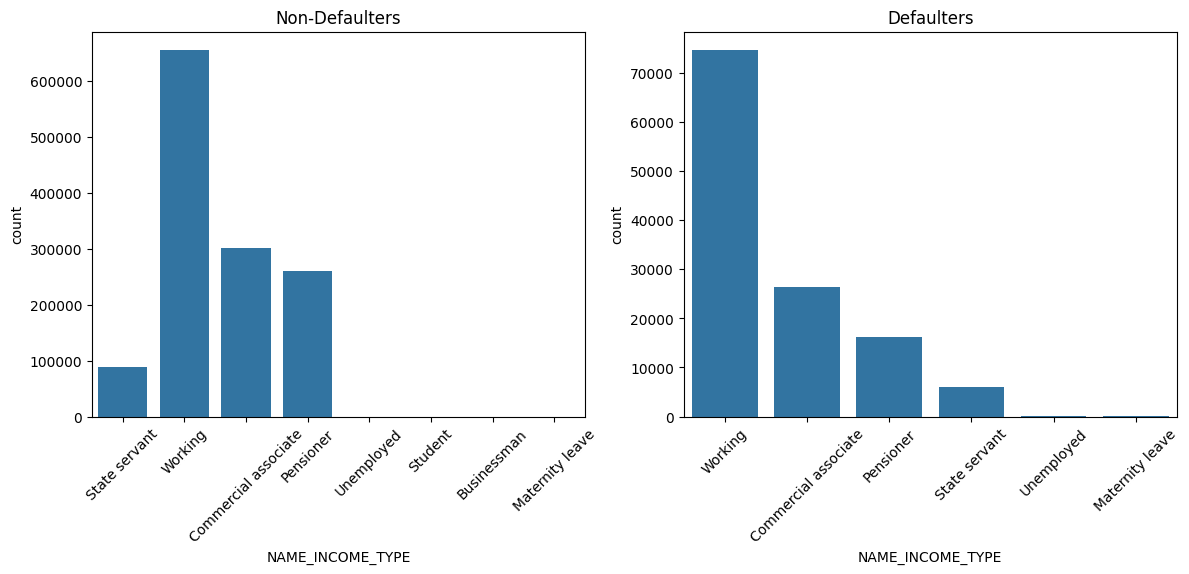

In [107]:
plt.figure(figsize=(14, 5))
plt.subplot(1,2,1)    
plt.xticks(rotation=45)
axis = sns.countplot(x = 'NAME_INCOME_TYPE',data=merged_data_target_0)
plt.title("Non-Defaulters")

plt.subplot(1,2,2) 
plt.xticks(rotation=45)
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=merged_data_target_1)
plt.title("Defaulters")

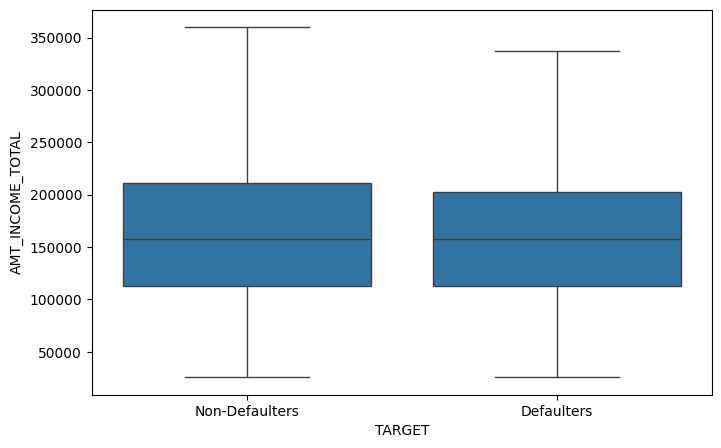

In [108]:
# Box plot for AMT_INCOME_TOTAL by TARGET
plt.figure(figsize=(8, 5))
ax = sns.boxplot(x="TARGET", y="AMT_INCOME_TOTAL", data=merged_data, showfliers=False)  

# Set x-axis labels
ax.set_xticklabels(["Non-Defaulters", "Defaulters"])  


plt.xlabel("TARGET")  
plt.ylabel("AMT_INCOME_TOTAL")
plt.show()

Text(0.5, 1.0, 'Defaulters')

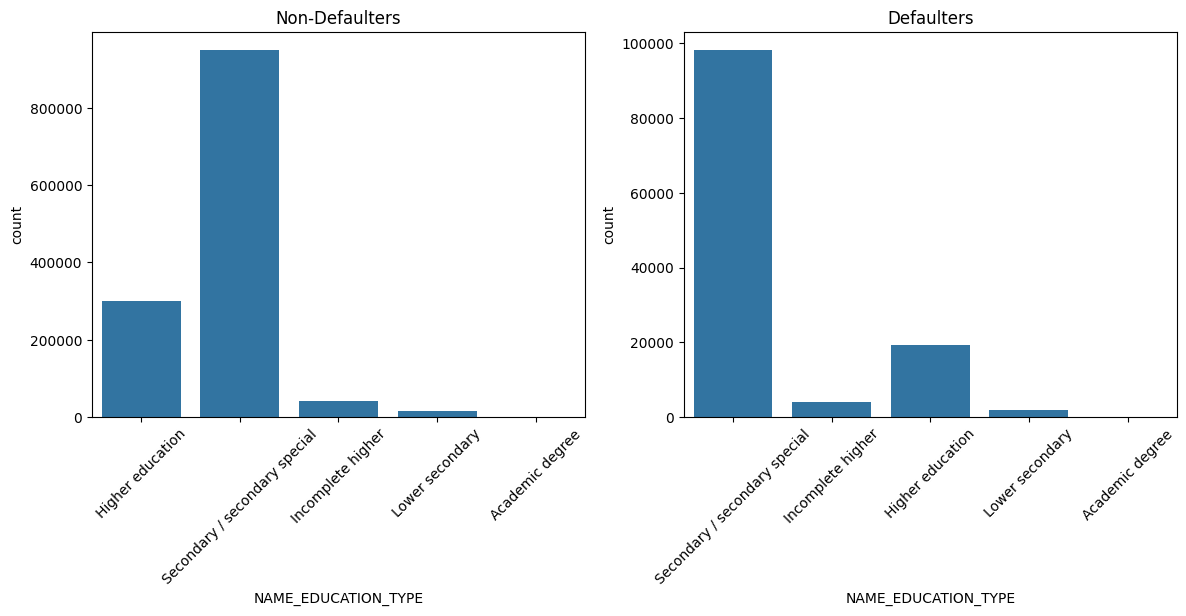

In [109]:
plt.figure(figsize=(14, 5))
plt.subplot(1,2,1)    
plt.xticks(rotation=45)
axis = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=merged_data_target_0)
plt.title("Non-Defaulters")

plt.subplot(1,2,2) 
plt.xticks(rotation=45)
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=merged_data_target_1)
plt.title("Defaulters")

Text(0.5, 1.0, 'Defaulters')

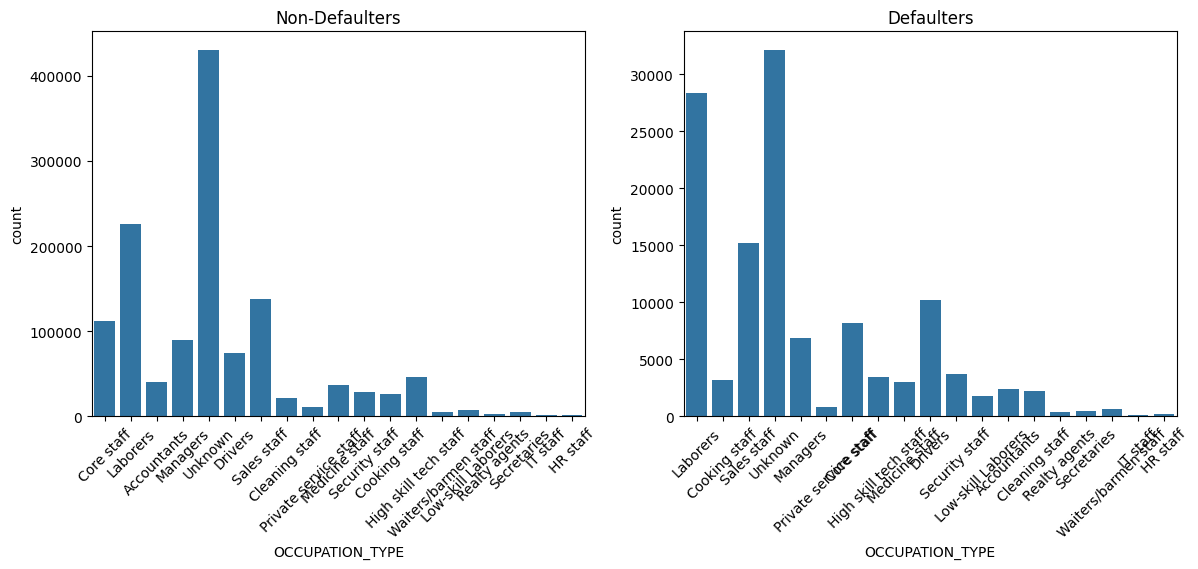

In [110]:
plt.figure(figsize=(14, 5))
plt.subplot(1,2,1)    
plt.xticks(rotation=45)
axis = sns.countplot(x = 'OCCUPATION_TYPE',data=merged_data_target_0)
plt.title("Non-Defaulters")

plt.subplot(1,2,2) 
plt.xticks(rotation=45)
ax = sns.countplot(x = 'OCCUPATION_TYPE',data=merged_data_target_1)
plt.title("Defaulters")

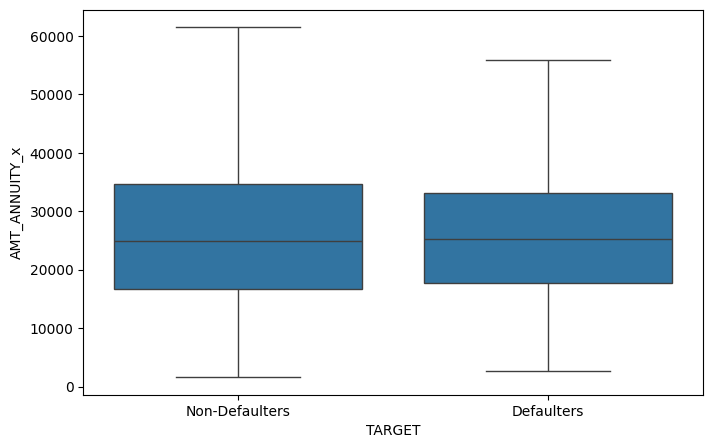

In [111]:
# Box plot for AMT_INCOME_TOTAL by TARGET
plt.figure(figsize=(8, 5))
ax = sns.boxplot(x="TARGET", y="AMT_ANNUITY_x", data=merged_data, showfliers=False)  
ax.set_xticklabels(["Non-Defaulters", "Defaulters"])  
plt.xlabel("TARGET") 
plt.ylabel("AMT_ANNUITY_x")
plt.show()